# CA2 PDAS Individual Assignment
By:
Hubert Heng Kheng Yeow,
p2214494,
DAAA1B02

## Title: "What is an energy crisis and what we can do to prevent one"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 1: Extracting the datasets

In [2]:
# *Final energy consumption datasets*
sg_final_energy_consum = pd.read_csv("Datasets/Final energy consumption/total-final-energy-consumption-2009-to-2019.csv")
world_final_energy_consum = pd.read_csv("Datasets/Final energy consumption/800258b7-7ec7-4e94-869d-ef506313f240_Data.csv")

# *Primary energy consumption dataset*
primary_energy_consum = pd.read_csv("Datasets/Primary energy consumption/primary-energy-source-bar.csv")

# *Energy production dataset*
primary_energy_supply = pd.read_csv("Datasets/Others/DP_LIVE_15012023083938540.csv")

# *Others datasets*
energy_use_pp = pd.read_csv("Datasets/Others/per-capita-energy-use.csv")
fossilfuel_left_years = pd.read_csv("Datasets/Others/years-of-fossil-fuel-reserves-left.csv")

## Step 2: Visualise the datasets before cleaning. 
Check for any NaN values or unwanted data in the dataframes.

In [3]:
datasets = [sg_final_energy_consum, world_final_energy_consum, primary_energy_consum, primary_energy_supply, energy_use_pp, fossilfuel_left_years]
datasets_title = ["**Final energy consumption in Singapore**", "**Final energy consumption of the world**", "**Primary energy consumption by sources of the world**", 
"**Primary energy supply of the world**", "**Energy use per person over the world**", "**Years left before fossil fuels ran out"]
for i in range(len(datasets)):
    print(datasets_title[i])
    print(datasets[i].isna().sum())
    print("\n")

**Final energy consumption in Singapore**
year                0
sector              0
energy_products     0
consumption_ktoe    0
dtype: int64


**Final energy consumption of the world**
Series Name      3
Series Code      5
Country Name     5
Country Code     5
1997 [YR1997]    5
1998 [YR1998]    5
1999 [YR1999]    5
2000 [YR2000]    5
2001 [YR2001]    5
2002 [YR2002]    5
2003 [YR2003]    5
2004 [YR2004]    5
2005 [YR2005]    5
2006 [YR2006]    5
2007 [YR2007]    5
2008 [YR2008]    5
2009 [YR2009]    5
2010 [YR2010]    5
2011 [YR2011]    5
2012 [YR2012]    5
2013 [YR2013]    5
2014 [YR2014]    5
2015 [YR2015]    5
2016 [YR2016]    5
dtype: int64


**Primary energy consumption by sources of the world**
Entity                          0
Code                         1311
Year                            0
Coal Consumption - TWh         26
Oil Consumption - TWh           0
Gas Consumption - TWh          10
Nuclear Consumption - TWh     320
Hydro Consumption - TWh         7
Wind Consumptio

It appears that every dataframe except for the "sg_final_energy_consum" dataframe has some NaN values. Lets take a lot at what this missing data are.

In [4]:
datasets = [world_final_energy_consum, primary_energy_consum, primary_energy_supply, energy_use_pp, fossilfuel_left_years]
datasets_title = ["**Final energy consumption of the world**", "**Primary energy consumption by sources of the world**", 
"**Primary energy supply of the world**", "**Energy use per person over the world**", "**Years left before fossil fuels ran out"]
for i in range(len(datasets)):
    print(datasets_title[i])
    is_na = datasets[i].isna()
    print(datasets[i][is_na.any(axis=1)])
    print("\n")

**Final energy consumption of the world**
                                        Series Name Series Code Country Name  \
259                                             NaN         NaN          NaN   
260                                             NaN         NaN          NaN   
261                                             NaN         NaN          NaN   
262  Data from database: Sustainable Energy for All         NaN          NaN   
263                        Last Updated: 06/30/2018         NaN          NaN   

    Country Code 1997 [YR1997] 1998 [YR1998] 1999 [YR1999] 2000 [YR2000]  \
259          NaN           NaN           NaN           NaN           NaN   
260          NaN           NaN           NaN           NaN           NaN   
261          NaN           NaN           NaN           NaN           NaN   
262          NaN           NaN           NaN           NaN           NaN   
263          NaN           NaN           NaN           NaN           NaN   

    2001 [YR2001] 20

## Step 3: Cleaning the datasets
Lets check the NaN values in each dataframe such that we can figure out how we are going to clean that dataframe.
We will start first with the "world_final_energy_consum" dataframe.

In [5]:
world_final_energy_consum.iloc[258:264]

,Series Name,Series Code,Country Name,Country Code,1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
258,Total final energy consumption (TFEC) (TJ),1.1_TOTAL.FINAL.ENERGY.CONSUM,Zimbabwe,ZWE,343268.363232,347106.067848,379962.064584,361585.362024,350181.104976,345534.259392,...,361194.147432,346045.886352,346388.869008,353016.070992,373974.60564,390599.927892,391107.493656,395183.343456,396615.270924,..
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,Data from database: Sustainable Energy for All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,Last Updated: 06/30/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
world_final_energy_consum.iloc[np.r_[4:29, 176], :]

,Series Name,Series Code,Country Name,Country Code,1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
4,Total final energy consumption (TFEC) (TJ),1.1_TOTAL.FINAL.ENERGY.CONSUM,Caucasian and Central Asia,CCA,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
5,Total final energy consumption (TFEC) (TJ),1.1_TOTAL.FINAL.ENERGY.CONSUM,Caucasus and Central Asia,GCA,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
6,Total final energy consumption (TFEC) (TJ),1.1_TOTAL.FINAL.ENERGY.CONSUM,Eastern Asia (including Japan),GEJ,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
7,Total final energy consumption (TFEC) (TJ),1.1_TOTAL.FINAL.ENERGY.CONSUM,Eastern Asia (not including Japan),GEA,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
8,Total final energy consumption (TFEC) (TJ),1.1_TOTAL.FINAL.ENERGY.CONSUM,Eastern Europe,GEE,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
9,Total final energy consumption (TFEC) (TJ),1.1_TOTAL.FINAL.ENERGY.CONSUM,Europe,GEU,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
10,Total final energy consumption (TFEC) (TJ),1.1_TOTAL.FINAL.ENERGY.CONSUM,High income,HIC,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
11,Total final energy consumption (TFEC) (TJ),1.1_TOTAL.FINAL.ENERGY.CONSUM,High income: nonOECD,NOC,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
12,Total final energy consumption (TFEC) (TJ),1.1_TOTAL.FINAL.ENERGY.CONSUM,High income: OECD,OEC,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
13,Total final energy consumption (TFEC) (TJ),1.1_TOTAL.FINAL.ENERGY.CONSUM,Latin America and Caribbean,GLC,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


There is also missing data for the various regions/income groups, being labelled as "..", we do not need these regions/income groups, hence we can drop them along with the NaN values.

In [7]:
world_final_energy_consum = world_final_energy_consum.drop(world_final_energy_consum.index[4:29])
world_final_energy_consum = world_final_energy_consum.drop(176)
world_final_energy_consum = world_final_energy_consum.drop(0)
world_final_energy_consum = world_final_energy_consum.dropna()

There are some unwanted columns that we will not be using for the analysis. We can proceed to drop them.

In [8]:
world_final_energy_consum = world_final_energy_consum.drop(columns = ['Series Name', 'Series Code', '2016 [YR2016]'])

Now we move onto the other four dataframes

In [9]:
primary_energy_consum.iloc[np.r_[0:5, 5548:5553], :]

,Entity,Code,Year,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,Geo Biomass Other - TWh
0,Africa,NaN,1965,323.496120,341.26276,9.543755,0.0,41.118813,0.000000,NaN,NaN
1,Africa,NaN,1966,323.122200,369.48657,10.669916,0.0,45.862915,0.000000,NaN,NaN
2,Africa,NaN,1967,330.291560,368.12524,10.545670,0.0,47.875538,0.000000,NaN,NaN
3,Africa,NaN,1968,343.512900,389.19986,10.688970,0.0,56.000473,0.000000,NaN,NaN
4,Africa,NaN,1969,346.642940,396.92285,12.492000,0.0,65.352100,0.000000,NaN,NaN
5548,Western Africa (BP),NaN,2017,7.843330,377.44293,220.183720,NaN,49.798744,0.472493,0.859688,0.316682
5549,Western Africa (BP),NaN,2018,9.002492,434.53244,235.207290,NaN,52.793194,0.502948,1.675828,0.216594
5550,Western Africa (BP),NaN,2019,8.791768,442.07007,241.824900,NaN,59.361206,0.606558,2.101726,0.251494
5551,Western Africa (BP),NaN,2020,7.973295,436.52267,258.820500,NaN,58.433865,1.089399,2.176087,0.247744
5552,Western Africa (BP),NaN,2021,9.220235,471.56198,279.980320,NaN,61.700436,1.081189,3.123060,0.247609


These NaN values in the column "Code" all belong to the various regions/income groups. We do not need these regions/income groups, we will hence drop the rows where "Code" == NaN.

In [10]:
primary_energy_consum = primary_energy_consum[primary_energy_consum['Code'].notna()]

Now lets see the rest of the NaN values.

In [11]:
is_na = primary_energy_consum.isna()
primary_energy_consum.isna().sum()

Entity                         0
Code                           0
Year                           0
Coal Consumption - TWh        26
Oil Consumption - TWh          0
Gas Consumption - TWh          3
Nuclear Consumption - TWh    164
Hydro Consumption - TWh        7
Wind Consumption - TWh        69
Solar Consumption - TWh       69
Geo Biomass Other - TWh       69
dtype: int64

We will fill these values as 0, treating the energy consumption to be 0 TWh

In [12]:
primary_energy_consum = primary_energy_consum.fillna(0)
primary_energy_consum.isna().sum()

Entity                       0
Code                         0
Year                         0
Coal Consumption - TWh       0
Oil Consumption - TWh        0
Gas Consumption - TWh        0
Nuclear Consumption - TWh    0
Hydro Consumption - TWh      0
Wind Consumption - TWh       0
Solar Consumption - TWh      0
Geo Biomass Other - TWh      0
dtype: int64

Now onto "primary_energy_supply" dataframe. We will first remove the "Flag Codes", "INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY" columns as we will not be using it for the analysis.

In [13]:
primary_energy_supply = primary_energy_supply.drop(columns = ['Flag Codes', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY'])
primary_energy_supply.isna().sum()

LOCATION       0
TIME           0
Value       2043
dtype: int64

Now, similar to the "primary_energy_consum" dataset, we will fill these values as 0, treating the years where the NaN values are as the years where the country has yet to record its primary energy supply.

In [14]:
primary_energy_supply = primary_energy_supply.fillna(0)
primary_energy_supply.isna().sum()

LOCATION    0
TIME        0
Value       0
dtype: int64

Now, onto "energy_use_pp" dataframe. Similar to the "primary_energy_consum" dataframe, these NaN values in the column "Code" all belong to the various regions/income groups. We do not need these regions/income groups, we will hence drop the rows where "Code" == NaN.

In [15]:
energy_use_pp = energy_use_pp[energy_use_pp['Code'].notna()]
energy_use_pp.isna().sum()

Entity                                                0
Code                                                  0
Year                                                  0
Primary energy consumption per capita (kWh/person)    0
dtype: int64

And finally, the last dataframe "fossilfuel_left_years", we simply need to fill the NaN values with 0, as the NaN values mean that there is 0 years of fossil fuel reserves left.

In [16]:
fossilfuel_left_years = fossilfuel_left_years.fillna(0)
fossilfuel_left_years.isna().sum()

Entity                            0
Code                              0
Year                              0
Gas reserves/production ratio     0
Coal reserves/production ratio    0
Oil reserves/production ratio     0
dtype: int64

Now that we have either replaced or removed all the NaN values in our datasets, we will now standadise the column names as well as the energy consumption unit (TWh) between the datasets. We also need to set the correct dtypes for each column in each dataframe.

In [17]:
datasets = [sg_final_energy_consum, world_final_energy_consum, primary_energy_consum, primary_energy_supply, energy_use_pp, fossilfuel_left_years]
datasets_title = ["**Final energy consumption in Singapore**", "**Final energy consumption of the world**", "**Primary energy consumption by sources of the world**", 
"**Primary energy supply of the world**", "**Energy use per person over the world**", "**Years left before fossil fuels ran out"]
for i in range(len(datasets)):
    print(datasets_title[i])
    print(datasets[i].columns)
    print("\n")

**Final energy consumption in Singapore**
Index(['year', 'sector', 'energy_products', 'consumption_ktoe'], dtype='object')


**Final energy consumption of the world**
Index(['Country Name', 'Country Code', '1997 [YR1997]', '1998 [YR1998]',
       '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]',
       '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
       '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]'],
      dtype='object')


**Primary energy consumption by sources of the world**
Index(['Entity', 'Code', 'Year', 'Coal Consumption - TWh',
       'Oil Consumption - TWh', 'Gas Consumption - TWh',
       'Nuclear Consumption - TWh', 'Hydro Consumption - TWh',
       'Wind Consumption - TWh', 'Solar Consumption - TWh',
       'Geo Biomass Other - TWh'],
      dtype='object')


**Primary energy supply of the world**
Index(['LOCATION', 

In [18]:
world_final_energy_consum.rename(columns= {
    "Country Name" : "Entity", "Country Code" : "Code", "1997 [YR1997]": '1997', "1998 [YR1998]": '1998', "1999 [YR1999]": '1999', "2000 [YR2000]": '2000', "2001 [YR2001]": '2001',
    "2002 [YR2002]": '2002', "2003 [YR2003]": '2003', "2004 [YR2004]": '2004', "2005 [YR2005]": '2005', "2006 [YR2006]": '2006', "2007 [YR2007]": '2007', "2008 [YR2008]": '2008',
    "2009 [YR2009]": '2009', "2010 [YR2010]": '2010', "2011 [YR2011]": '2011', "2012 [YR2012]": '2012', "2013 [YR2013]": '2013', "2014 [YR2014]": '2014', "2015 [YR2015]": '2015'
}, inplace= True)

primary_energy_supply.rename(columns= {
    "LOCATION" : "Code",
    "TIME" : "Year"
}, inplace= True)

sg_final_energy_consum.rename(columns= {
    "year" : "Year"
}, inplace= True)

Convert all energy units to TWh, either storing them in new columns or replacing existing values with them.

In [19]:
energy_use_pp["Primary energy consumption per capita (TWh/person)"] = energy_use_pp["Primary energy consumption per capita (kWh/person)"] * 0.000000001
primary_energy_supply["Value (TWh)"] = primary_energy_supply["Value"] * 11.63
sg_final_energy_consum["consumption_TWh"] = sg_final_energy_consum["consumption_ktoe"] * 0.01163
for year in ['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']:
    world_final_energy_consum[year] = world_final_energy_consum[year].astype('float') * 0.000278

Now lets reshape the "world_final_energy_consum" dataframe, where the years will be in one column, just like the 5 other datasets.

In [20]:
world_final_energy_consum = world_final_energy_consum.melt(id_vars=['Entity', 'Code'], var_name="Year", value_name="consumption_TWh")
world_final_energy_consum = world_final_energy_consum.sort_values('Entity')
print(world_final_energy_consum)

           Entity Code  Year  consumption_TWh
931   Afghanistan  AFG  2001         5.919627
1163  Afghanistan  AFG  2002         7.619617
3715  Afghanistan  AFG  2013        37.567094
3251  Afghanistan  AFG  2011        49.474299
1395  Afghanistan  AFG  2003         8.308606
...           ...  ...   ...              ...
463      Zimbabwe  ZWE  1998        96.495487
927      Zimbabwe  ZWE  2000       100.520731
2551     Zimbabwe  ZWE  2007       100.411973
1391     Zimbabwe  ZWE  2002        96.058524
4407     Zimbabwe  ZWE  2015       110.259045

[4408 rows x 4 columns]


Now, lets view the dtypes in our data.

In [21]:
datasets = [sg_final_energy_consum, world_final_energy_consum, primary_energy_consum, primary_energy_supply, energy_use_pp, fossilfuel_left_years]
datasets_title = ["**Final energy consumption in Singapore**", "**Final energy consumption of the world**", "**Primary energy consumption by sources of the world**", 
"**Primary energy supply of the world**", "**Energy use per person over the world**", "**Years left before fossil fuels ran out"]
for i in range(len(datasets)):
    print(datasets_title[i])
    print(datasets[i].info())
    print("\n")

**Final energy consumption in Singapore**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              330 non-null    int64  
 1   sector            330 non-null    object 
 2   energy_products   330 non-null    object 
 3   consumption_ktoe  330 non-null    float64
 4   consumption_TWh   330 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 13.0+ KB
None


**Final energy consumption of the world**
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4408 entries, 931 to 4407
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           4408 non-null   object 
 1   Code             4408 non-null   object 
 2   Year             4408 non-null   object 
 3   consumption_TWh  4408 non-null   float64
dtypes: float64(1), object(3)

As we can see, we have to change the "Year" for all the dataframes to "datetime" instead of "int64" or "object"

In [22]:
datasets = [sg_final_energy_consum, primary_energy_consum, primary_energy_supply, energy_use_pp, fossilfuel_left_years]
for dataframe in datasets:
    dataframe["Year"] = dataframe["Year"].astype(object)

In [23]:
datasets = [sg_final_energy_consum, world_final_energy_consum, primary_energy_consum, primary_energy_supply, energy_use_pp, fossilfuel_left_years]
datasets_title = ["**Final energy consumption in Singapore**", "**Final energy consumption of the world**", "**Primary energy consumption by sources of the world**", 
"**Primary energy supply of the world**", "**Energy use per person over the world**", "**Years left before fossil fuels ran out"]
for i in range(len(datasets)):
    print(datasets_title[i])
    print(datasets[i]['Year'])
    print("\n")

**Final energy consumption in Singapore**
0      2009
1      2009
2      2009
3      2009
4      2009
       ... 
325    2019
326    2019
327    2019
328    2019
329    2019
Name: Year, Length: 330, dtype: object


**Final energy consumption of the world**
931     2001
1163    2002
3715    2013
3251    2011
1395    2003
        ... 
463     1998
927     2000
2551    2007
1391    2002
4407    2015
Name: Year, Length: 4408, dtype: object


**Primary energy consumption by sources of the world**
114     1965
115     1966
116     1967
117     1968
118     1969
        ... 
5605    2017
5606    2018
5607    2019
5608    2020
5609    2021
Name: Year, Length: 4299, dtype: object


**Primary energy supply of the world**
0       1960
1       1961
2       1962
3       1963
4       1964
        ... 
9233    2017
9234    2018
9235    2019
9236    2020
9237    2021
Name: Year, Length: 9238, dtype: object


**Energy use per person over the world**
0        1980
1        1981
2        1982
3        19

In [24]:
datasets = [sg_final_energy_consum, world_final_energy_consum, primary_energy_consum, primary_energy_supply, energy_use_pp, fossilfuel_left_years]
for dataframe in datasets:
    dataframe["Year"] = pd.to_datetime(dataframe["Year"], format="%Y")

In [25]:
datasets = [sg_final_energy_consum, world_final_energy_consum, primary_energy_consum, primary_energy_supply, energy_use_pp, fossilfuel_left_years]
datasets_title = ["**Final energy consumption in Singapore**", "**Final energy consumption of the world**", "**Primary energy consumption by sources of the world**", 
"**Primary energy supply of the world**", "**Energy use per person over the world**", "**Years left before fossil fuels ran out"]
for i in range(len(datasets)):
    print(datasets_title[i])
    print(datasets[i].info())
    print("\n")

**Final energy consumption in Singapore**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year              330 non-null    datetime64[ns]
 1   sector            330 non-null    object        
 2   energy_products   330 non-null    object        
 3   consumption_ktoe  330 non-null    float64       
 4   consumption_TWh   330 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 13.0+ KB
None


**Final energy consumption of the world**
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4408 entries, 931 to 4407
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Entity           4408 non-null   object        
 1   Code             4408 non-null   object        
 2   Year             4408 non-null

Checking the various countries again, I realised that I have left out some suspicious looking country codes that do not look like they belong to a country. Hence, I went to remove them.

In [26]:
remove_primary_energy_consum = ['OWID_USS', 'OWID_WRL']
remove_primary_energy_supply = ['WLD', 'EU28', 'OECD', 'G20', 'EU27_2020']

for remove in remove_primary_energy_consum:
    primary_energy_consum = primary_energy_consum[primary_energy_consum['Code'] != remove]

for remove in remove_primary_energy_supply:
    primary_energy_supply = primary_energy_supply[primary_energy_supply['Code'] != remove]
    
print(primary_energy_consum['Code'].unique())
print(primary_energy_supply['Code'].unique())

['DZA' 'ARG' 'AUS' 'AUT' 'AZE' 'BGD' 'BLR' 'BEL' 'BRA' 'BGR' 'CAN' 'CHL'
 'CHN' 'COL' 'HRV' 'CYP' 'CZE' 'DNK' 'ECU' 'EGY' 'EST' 'FIN' 'FRA' 'DEU'
 'GRC' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JPN'
 'KAZ' 'KWT' 'LVA' 'LTU' 'LUX' 'MYS' 'MEX' 'MAR' 'NLD' 'NZL' 'MKD' 'NOR'
 'OMN' 'PAK' 'PER' 'PHL' 'POL' 'PRT' 'QAT' 'ROU' 'RUS' 'SAU' 'SGP' 'SVK'
 'SVN' 'ZAF' 'KOR' 'ESP' 'LKA' 'SWE' 'CHE' 'TWN' 'THA' 'TTO' 'TUR' 'TKM'
 'UKR' 'ARE' 'GBR' 'USA' 'UZB' 'VEN' 'VNM']
['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'OEU' 'ALB' 'DZA' 'ARG' 'ARM' 'AZE'
 'BGD' 'BLR' 'BIH' 'BRA' 'BRN' 'BGR' 'KHM' 'CHL' 'CHN' 'COL' 'HRV' 'CYP'
 'EGY' 'EST' 'ETH' 'GEO' 'GHA' 'HTI' 'HKG' 'IND' 'IDN' 'IRN' 'ISR' 'KAZ'
 'LVA' 'LTU' 'MKD' 'MYS' 'MLT' 'MDA' 'MOZ' 'NGA' 'PAK' 'PRY' 'PER' 'PHL'
 'ROU' 'RUS' 'SAU' 'SGP' 'SVN' 'ZAF' 'SDN' 'TWN' 'TZA' 'THA' 'UKR' 'ARE'
 'URY' 

## Step 4: Visulizing the cleaned datasets

Let's first visualise the first few rows in our data.

In [27]:
datasets = [sg_final_energy_consum, world_final_energy_consum, primary_energy_consum, primary_energy_supply, energy_use_pp, fossilfuel_left_years]
datasets_title = ["**Final energy consumption in Singapore**", "**Final energy consumption of the world**", "**Primary energy consumption by sources of the world**", 
"**Primary energy supply of the world**", "**Energy use per person over the world**", "**Years left before fossil fuels ran out"]
for i in range(len(datasets)):
    print(datasets_title[i])
    display(datasets[i].head())
    print("\n")

**Final energy consumption in Singapore**


,Year,sector,energy_products,consumption_ktoe,consumption_TWh
0,2009-01-01,Commerce and Services-related,Coal and Peat,0.0,0.000000
1,2009-01-01,Commerce and Services-related,Crude Oil,0.0,0.000000
2,2009-01-01,Commerce and Services-related,Electricity,1272.6,14.800338
3,2009-01-01,Commerce and Services-related,Natural Gas,72.9,0.847827
4,2009-01-01,Commerce and Services-related,Others,0.0,0.000000




**Final energy consumption of the world**


,Entity,Code,Year,consumption_TWh
931,Afghanistan,AFG,2001-01-01,5.919627
1163,Afghanistan,AFG,2002-01-01,7.619617
3715,Afghanistan,AFG,2013-01-01,37.567094
3251,Afghanistan,AFG,2011-01-01,49.474299
1395,Afghanistan,AFG,2003-01-01,8.308606




**Primary energy consumption by sources of the world**


,Entity,Code,Year,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,Geo Biomass Other - TWh
114,Algeria,DZA,1965-01-01,0.81410,15.405252,7.430500,0.0,1.182796,0.0,0.0,0.0
115,Algeria,DZA,1966-01-01,0.79084,20.272705,7.719250,0.0,1.049731,0.0,0.0,0.0
116,Algeria,DZA,1967-01-01,0.60476,18.942032,7.488250,0.0,1.212365,0.0,0.0,0.0
117,Algeria,DZA,1968-01-01,0.63965,20.167301,7.873250,0.0,1.664785,0.0,0.0,0.0
118,Algeria,DZA,1969-01-01,0.81410,21.305930,10.351687,0.0,1.067473,0.0,0.0,0.0




**Primary energy supply of the world**


,Code,Year,Value,Value (TWh)
0,AUS,1960-01-01,31.483,366.14729
1,AUS,1961-01-01,32.664,379.88232
2,AUS,1962-01-01,34.085,396.40855
3,AUS,1963-01-01,35.961,418.22643
4,AUS,1964-01-01,37.404,435.00852




**Energy use per person over the world**


,Entity,Code,Year,Primary energy consumption per capita (kWh/person),Primary energy consumption per capita (TWh/person)
0,Afghanistan,AFG,1980-01-01,623.92865,6.239287e-07
1,Afghanistan,AFG,1981-01-01,786.83690,7.868369e-07
2,Afghanistan,AFG,1982-01-01,926.65125,9.266513e-07
3,Afghanistan,AFG,1983-01-01,1149.19590,1.149196e-06
4,Afghanistan,AFG,1984-01-01,1121.57290,1.121573e-06




**Years left before fossil fuels ran out


,Entity,Code,Year,Gas reserves/production ratio,Coal reserves/production ratio,Oil reserves/production ratio
0,World,OWID_WRL,1980-01-01,49.630640,0.0,29.712940
1,World,OWID_WRL,1981-01-01,50.559677,0.0,31.809710
2,World,OWID_WRL,1982-01-01,51.930416,0.0,34.550396
3,World,OWID_WRL,1983-01-01,52.548950,0.0,35.541157
4,World,OWID_WRL,1984-01-01,50.168175,0.0,35.475735


Next, let's check for some outliers in our data.

In [28]:
def detect_outliers (dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 = Q1
    lower_fence = Q1 + 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers_condition = ((dataframe[column] < (lower_fence)) | (dataframe[column] > (upper_fence)))
    outliers = dataframe[outliers_condition]
    if len(outliers) == 0:
        print(f'No outliers in {column}')
    else: 
        print(f'There are {len(outliers)} outliers in {column}')
    plt.boxplot(dataframe[column])
    plt.title(f'Boxplot of outliers')
    plt.show()
    return outliers

There are 9631 outliers in Primary energy consumption per capita (TWh/person)


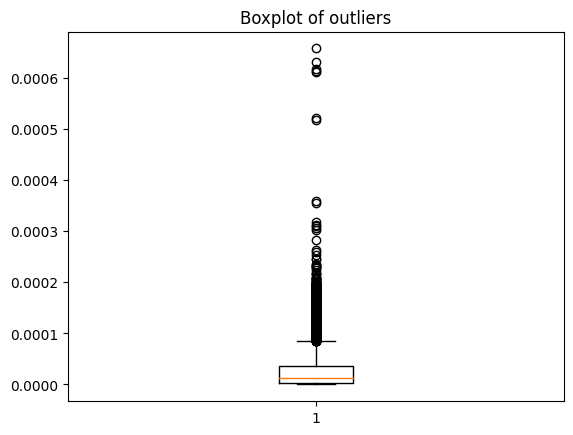



There are 8928 outliers in Value (TWh)


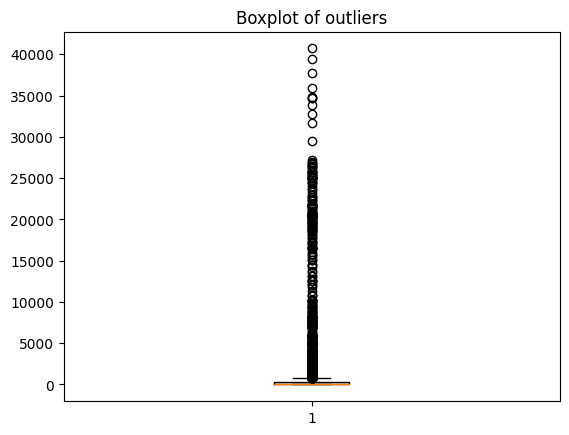



There are 165 outliers in consumption_TWh


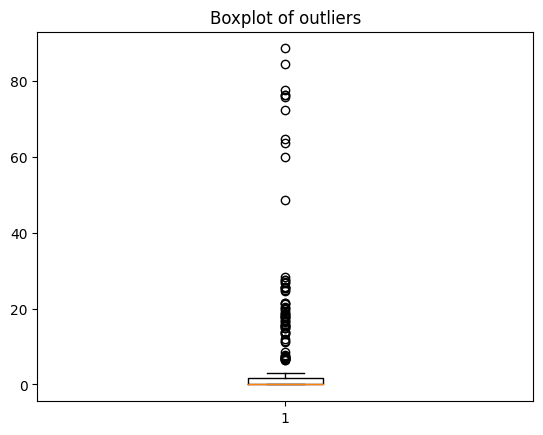



There are 4408 outliers in consumption_TWh


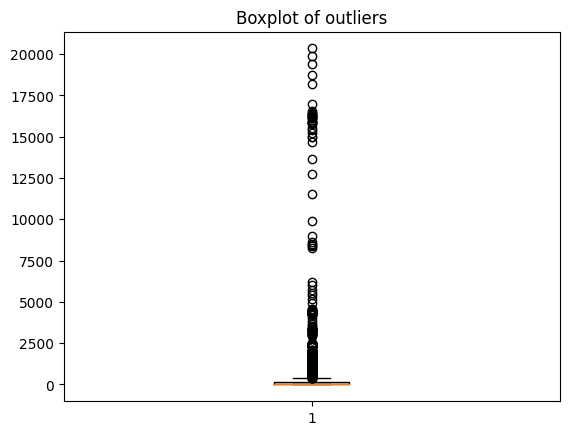

In [29]:
datasets = [energy_use_pp, primary_energy_supply, sg_final_energy_consum, world_final_energy_consum]
datasets_column = ["Primary energy consumption per capita (TWh/person)", "Value (TWh)", "consumption_TWh", "consumption_TWh"]
for i in range(len(datasets)):
    detect_outliers(datasets[i], datasets_column[i])
    print("\n")

In [31]:
sg_final_energy_consum.to_csv(r"C:\Users\huber\OneDrive - Singapore Polytechnic\Sp Year 1 Sem 2\PDAS\CA2\DAAA1B02-2214494-HubertHeng\Cleaned Datasets" + "/sg_final_energy_consum.csv")
world_final_energy_consum.to_csv(r"C:\Users\huber\OneDrive - Singapore Polytechnic\Sp Year 1 Sem 2\PDAS\CA2\DAAA1B02-2214494-HubertHeng\Cleaned Datasets" + "/world_final_energy_consum.csv")
primary_energy_consum.to_csv(r"C:\Users\huber\OneDrive - Singapore Polytechnic\Sp Year 1 Sem 2\PDAS\CA2\DAAA1B02-2214494-HubertHeng\Cleaned Datasets" + "/primary_energy_consum.csv")
primary_energy_supply.to_csv(r"C:\Users\huber\OneDrive - Singapore Polytechnic\Sp Year 1 Sem 2\PDAS\CA2\DAAA1B02-2214494-HubertHeng\Cleaned Datasets" + "/primary_energy_supply.csv")
energy_use_pp.to_csv(r"C:\Users\huber\OneDrive - Singapore Polytechnic\Sp Year 1 Sem 2\PDAS\CA2\DAAA1B02-2214494-HubertHeng\Cleaned Datasets" + "/energy_use_pp.csv")
fossilfuel_left_years.to_csv(r"C:\Users\huber\OneDrive - Singapore Polytechnic\Sp Year 1 Sem 2\PDAS\CA2\DAAA1B02-2214494-HubertHeng\Cleaned Datasets" + "/fossilfuel_left_years.csv")

## Step 5: Data visualisation

#### Step 5.1: What is an energy crisis?

When demand for energy cannot be met, an energy crisis will occur. An energy crisis happens when the world/country's primary supply of energy cannot meet the demand of the world/country's primary consumption of energy.

In [ ]:
# Extracting required information from the datasets to use in graphs
# Total and mean world final energy consumption over the years
world_final_energy_consum_each_year = world_final_energy_consum.groupby('Year')['consumption_TWh'].agg([np.sum, np.mean])

# Total and mean world primary energy consumption over the years
world_primary_energy_consum_each_year_by_type = primary_energy_consum.groupby('Year')[['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh',
'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh']].agg([np.sum, np.mean])

# Total and mean world primary energy supply over the years
world_primary_energy_supply_each_year = primary_energy_supply.groupby('Year')['Value (TWh)'].agg([np.sum, np.mean])

Line graphs of mean and total world final and primary energy consumption against the world energy supply.

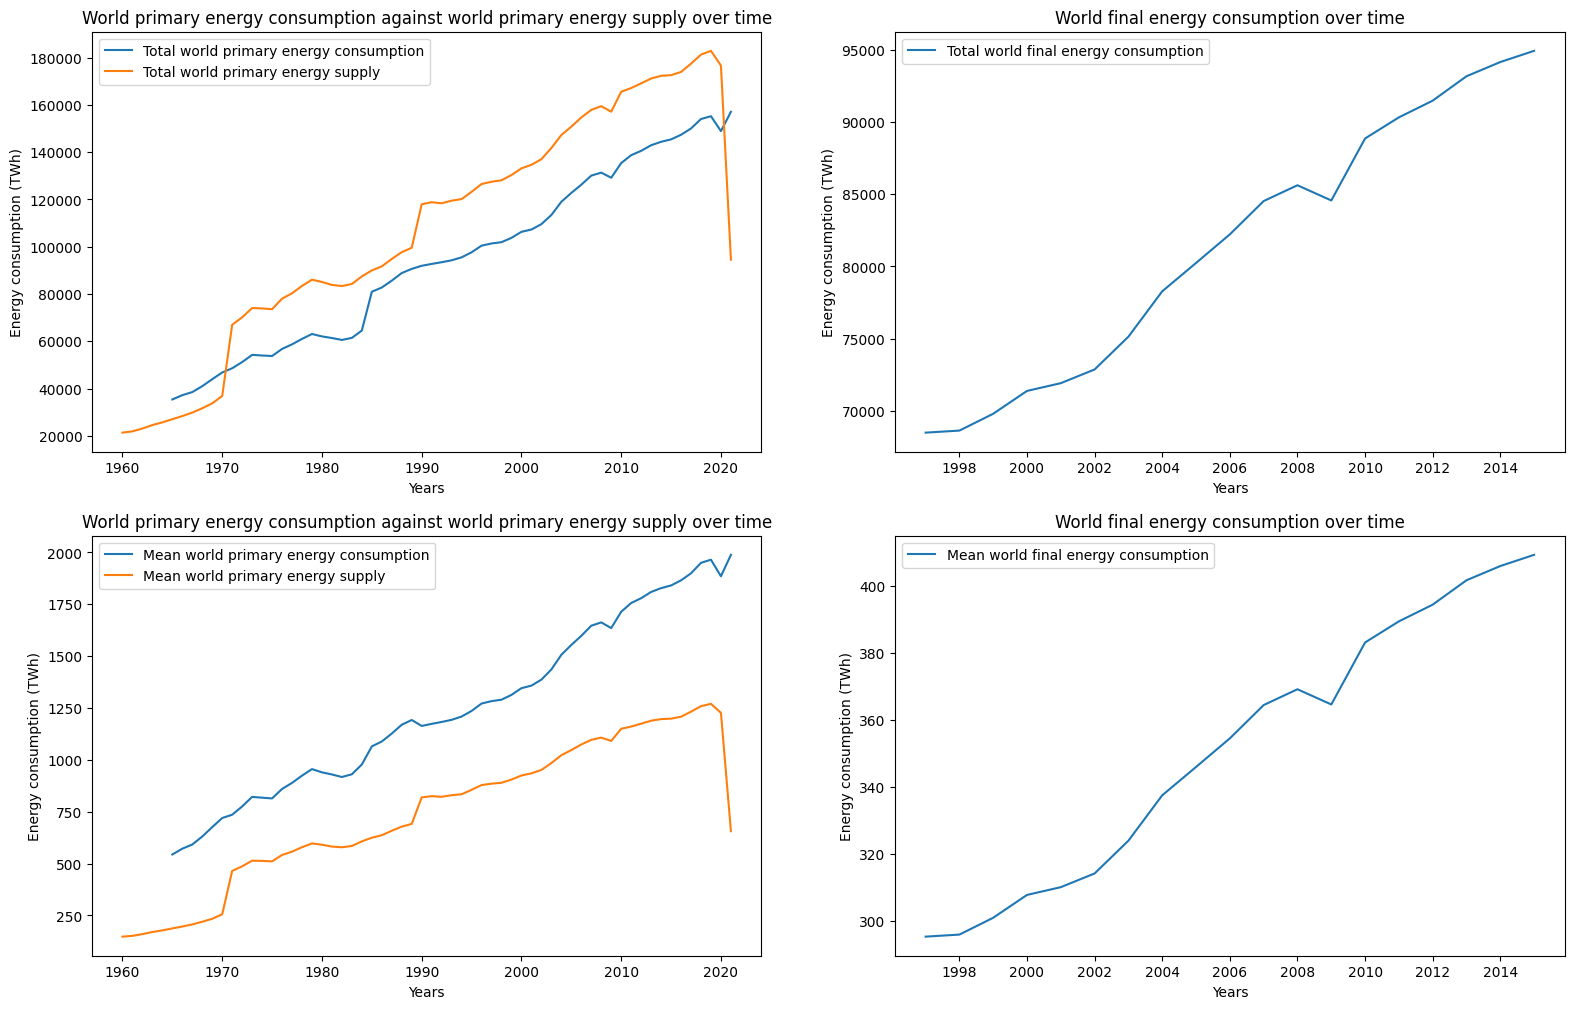

In [ ]:
plt.figure(1, figsize=(19, 12))

plt.subplot(221)
plt.plot(world_primary_energy_consum_each_year_by_type.loc[:, (['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh',
'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh'], 'sum')].sum(axis=1), label = 'Total world primary energy consumption')
plt.plot(world_primary_energy_supply_each_year['sum'], label = 'Total world primary energy supply')
plt.title("World primary energy consumption against world primary energy supply over time")
plt.xlabel("Years")
plt.ylabel("Energy consumption (TWh)")
plt.legend()

plt.subplot(222)
plt.plot(world_final_energy_consum_each_year['sum'], label = 'Total world final energy consumption')
plt.title("World final energy consumption over time")
plt.xlabel("Years")
plt.ylabel("Energy consumption (TWh)")
plt.legend()

plt.subplot(223)
plt.plot(world_primary_energy_consum_each_year_by_type.loc[:, (['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh',
'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh'], 'mean')].sum(axis=1), label = 'Mean world primary energy consumption')
plt.plot(world_primary_energy_supply_each_year['mean'], label = 'Mean world primary energy supply')
plt.title("World primary energy consumption against world primary energy supply over time")
plt.xlabel("Years")
plt.ylabel("Energy consumption (TWh)")
plt.legend()

plt.subplot(224)
plt.plot(world_final_energy_consum_each_year['mean'], label = 'Mean world final energy consumption')
plt.title("World final energy consumption over time")
plt.xlabel("Years")
plt.ylabel("Energy consumption (TWh)")
plt.legend()

plt.show()

- As we can see, there is a steady increase in the total and mean world final energy consumption as the years past. To explain, the main difference between primary and final world energy consumption is that primary energy consumption measures total domestic energy demand, while final energy consumption refers to what end users actually consume.  
- In the past up till 1970, the total world primary energy consumption was actually more than the total world primary energy supply. This data correlates perfectly to the 1970s energy crisis that occurred when the Western world, particularly the United States, Canada, Western Europe, Australia, and New Zealand, faced substantial petroleum shortages as well as elevated prices. Thankfully, after that, up till 2020, the total world primary energy supply remained a good 20000 TWh above the total world primary energy consumption.  
- Both continued to increase steadily, both increasing at about the same rate and both maintaining the same difference of about 20000 TWh, until 2020, where the total world primary energy supply saw an alarmingly steep drop of almost 100000 TWh, from 180000 TWh to 80000 TWh, 60000 TWh below the total world primary energy consumption, which was around 140000 TWh around that time. There wasn't an impact on the total world primary energy consumption, it continued its steady increase like the past 50 years.  
- One possible reason for that alarming decrease in the total world primary energy supply could be due to the COVID-19 pandamic that started at the same time in 2020. Due to the many lockdowns as well as restrictions, energy production, import and exports saw a large cut, hence explaining the huge decrease.  
- For the mean world primary energy consumption against world primary energy supply over time, the mean world primary energy consumption continued to be above the mean world primary energy supply for the whole 60 years. This could be due to the many third world countries around the world that are constantly facing an energy crisis, hence bringing the mean down. Similarly to the total world primary energy consumption against world primary energy supply over time, the world priamary energy supply dropped sharply after 2020.

#### Step 5.2: Consumption of energy around the world

Is the level of energy consumption the same everywhere? Let's find out with the graphs below.

In [ ]:
# Extracting required information from the datasets to use in graphs
# Total and mean world final energy consumption over the years
world_final_energy_consum_each_country = world_final_energy_consum.groupby('Code')['consumption_TWh'].agg([np.sum, np.mean])

# Total and mean world primary energy consumption over the years
world_primary_energy_consum_each_country_by_type = primary_energy_consum.groupby('Code')[['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh',
'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh']].agg([np.sum, np.mean])

Histogram of mean and total primary and final energy consumption around the world.

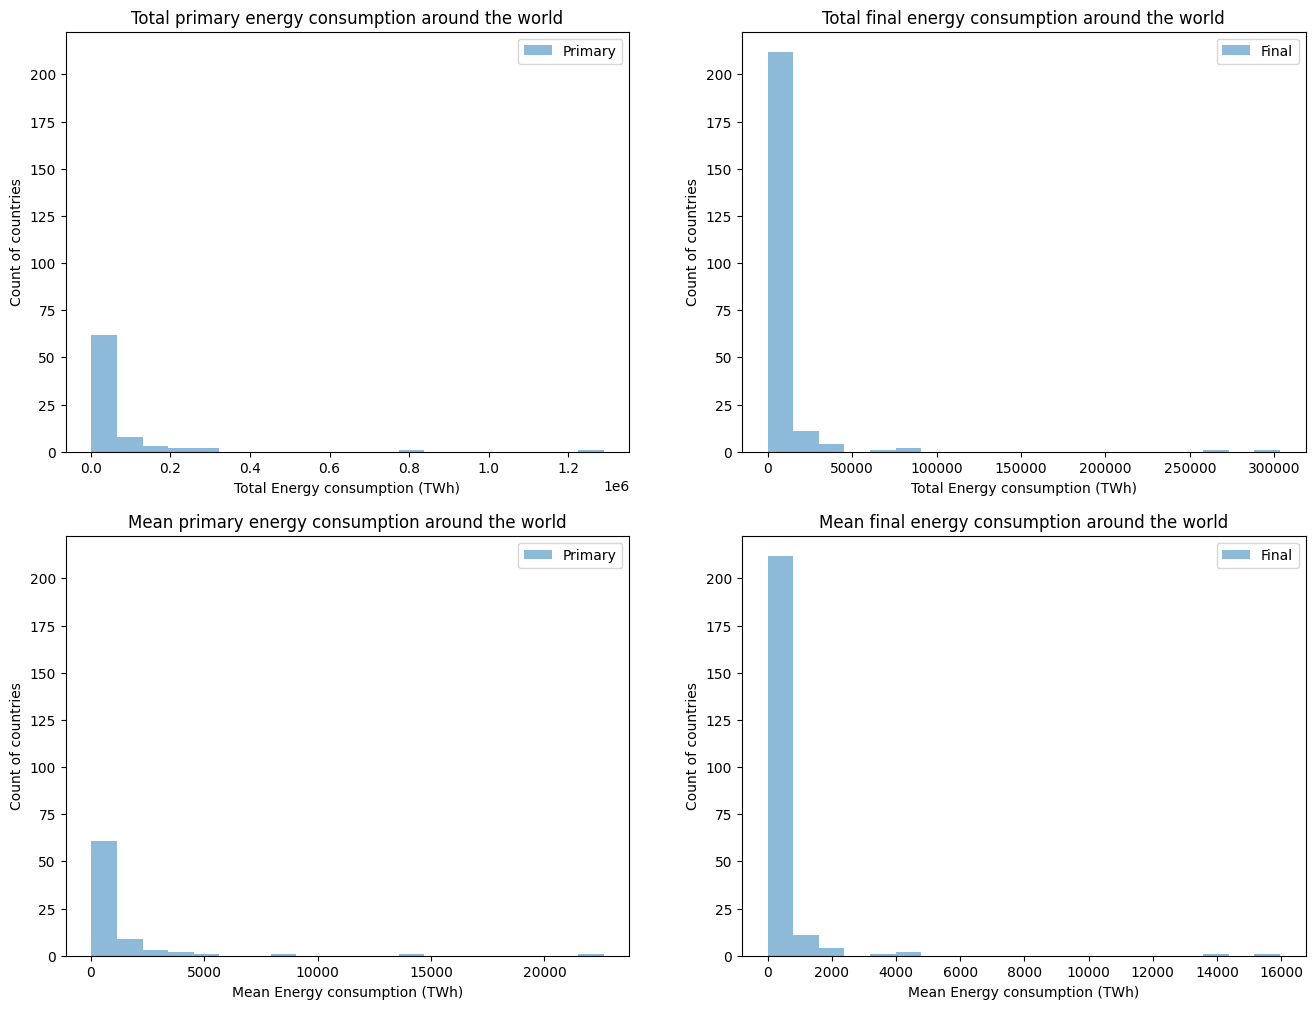

In [ ]:
plt.figure(1, figsize=(16, 12))
bins = 20

ax1 = plt.subplot(221)
plt.hist(world_primary_energy_consum_each_country_by_type.loc[:, (['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh',
'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh'], 'sum')].sum(axis=1), bins=bins, alpha=0.5, label="Primary")
plt.title("Total primary energy consumption around the world")
plt.xlabel("Total Energy consumption (TWh)")
plt.ylabel("Count of countries")
plt.legend(loc='upper right')

ax2 = plt.subplot(222, sharey = ax1)
plt.hist(world_final_energy_consum_each_country['sum'], bins=bins, alpha=0.5, label="Final")
plt.title("Total final energy consumption around the world")
plt.xlabel("Total Energy consumption (TWh)")
plt.ylabel("Count of countries")
plt.legend(loc='upper right')

ax3 = plt.subplot(223)
plt.hist(world_primary_energy_consum_each_country_by_type.loc[:, (['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh',
'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh'], 'mean')].sum(axis=1), bins=bins, alpha=0.5, label="Primary")
plt.title("Mean primary energy consumption around the world")
plt.xlabel("Mean Energy consumption (TWh)")
plt.ylabel("Count of countries")
plt.legend(loc='upper right')

ax4 = plt.subplot(224, sharey = ax3)
plt.hist(world_final_energy_consum_each_country['mean'], bins=bins, alpha=0.5, label="Final")
plt.title("Mean final energy consumption around the world")
plt.xlabel("Mean Energy consumption (TWh)")
plt.ylabel("Count of countries")
plt.legend(loc='upper right')

plt.show()

- As we can see, the levels of energy consumption in each country around the world are not the same. All four histograms are positively skewed.
- In the histogram "Total primary energy consumption around the world", the mode is around 0.0 to 0.02 * 1e6 TWh, with a frequency of around 60. There are several outliers at around 0.8 and 1.3 * 1e6 TWh.
- In the histogram "Mean primary energy consumption around the world", the mode is around 0 to 20000 TWh, with a frequnecy of around 220. There are several outliers at around 270000 and 300000 TWh.
- In the histogram "Total final energy consumption around the world", the mode is around 0 to 2000 TWh, with a frequency of around 60. There are several outliers at around 8000, 14000 and 23000 TWh.
- In the histogram "Mean final energy consumption around the world", the mode is around 0 to 900 TWh, with a frequnecy of around 220. There are several outliers at around 14000 and 16000 TWh.
- Looking at the four histograms, we can spot many similaritites between them, which should be expected. They all have the same shape, their modes are all around 0 and they have few outliers.
- The only difference between them is that total and mean primary energy consumption has a mode of 60, while total and mean energy consumption has a mode of 220. This is to be expected, as the primary energy and final energy datasets do not have the same number of countries.
- Although these histograms are useful in visualising the distribution of the countries and spotting outliers, they dont really serve any more purposes in helping us analyse the consumption of energy in different countries.
- Lets hence draw up more graphs to help us realise this objective.

In [ ]:
# Extracting required information from the datasets to use in graphs
# Mean energy use per person over the year
energy_use_pp_each_year = energy_use_pp.groupby('Year')['Primary energy consumption per capita (kWh/person)'].mean()
energy_use_pp_by_country = energy_use_pp.groupby('Entity')['Primary energy consumption per capita (kWh/person)'].mean()
energy_use_pp_each_year_by_country = energy_use_pp.groupby(['Entity', 'Year'])['Primary energy consumption per capita (kWh/person)'].mean()

Line graphs of change in mean energy consumption per person across the world and in each country over time.

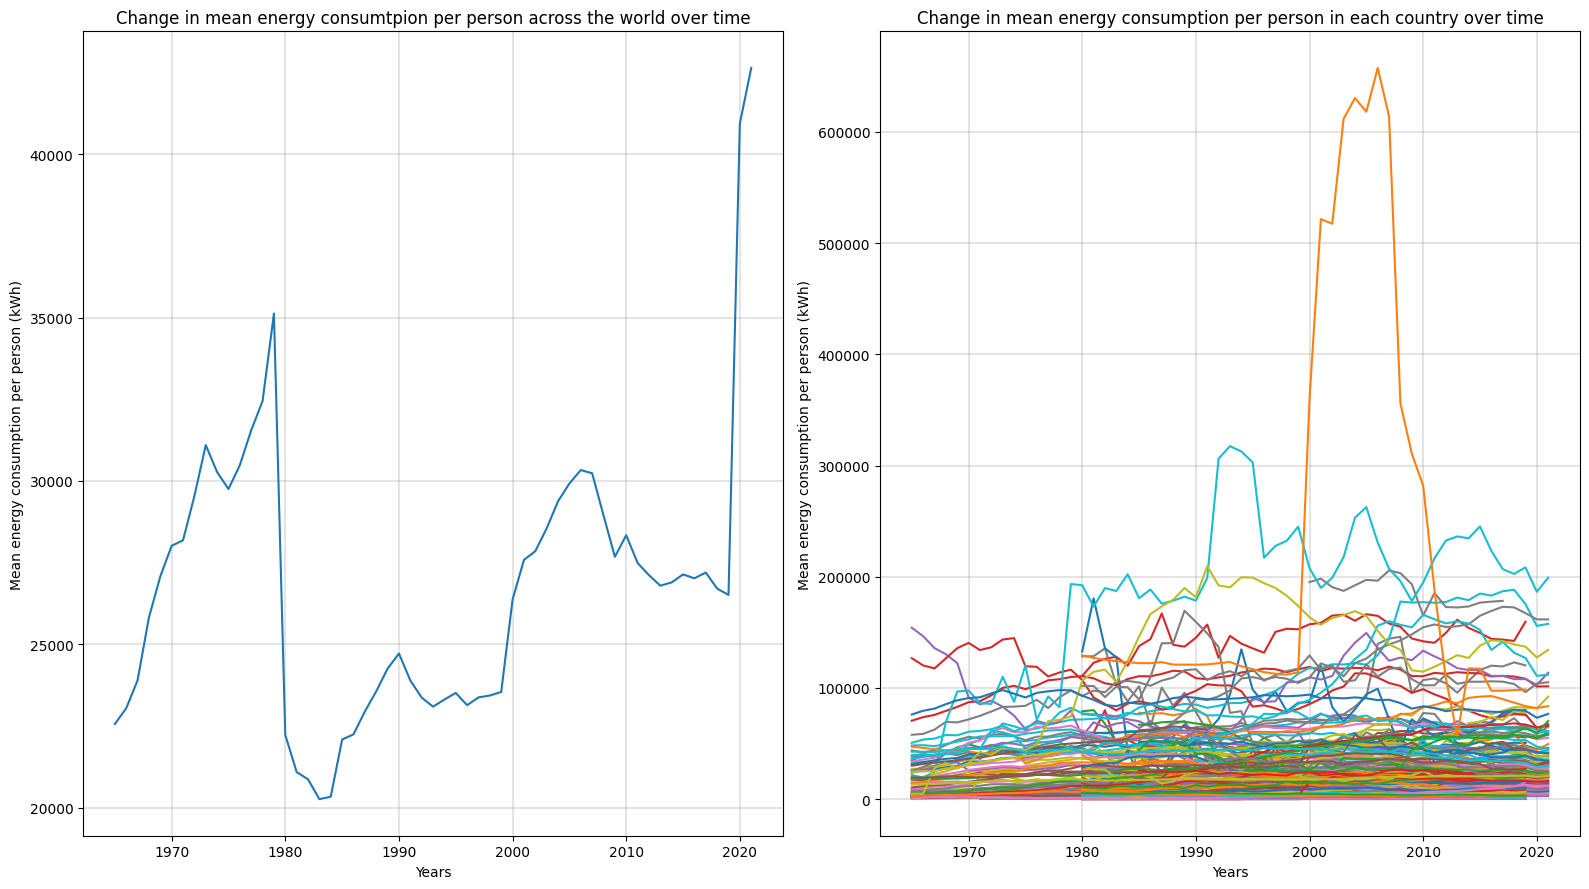

In [ ]:
plt.figure(1, figsize=(16, 9))

plt.subplot(121)
plt.plot(energy_use_pp_each_year)
plt.title("Change in mean energy consumtpion per person across the world over time")
plt.xlabel("Years")
plt.ylabel("Mean energy consumption per person (kWh)")
plt.grid(color='grey', linestyle='-', linewidth=0.3)

plt.subplot(122)
df = energy_use_pp_each_year_by_country.reset_index().pivot(index='Year', columns='Entity', values='Primary energy consumption per capita (kWh/person)')
plt.plot(df)
plt.title("Change in mean energy consumption per person in each country over time")
plt.xlabel("Years")
plt.ylabel("Mean energy consumption per person (kWh)")
plt.grid(color='grey', linestyle='-', linewidth=0.3)

plt.tight_layout()
plt.show()

- Through the line graph on the left, we can see the change in mean energy consumption per person across the world is not consistent. We would have expected it to increase steadily over the years since the total and mean world final energy consumption increased steadily over the years as seen in the very first graph. However, this does not seem to be the case.
- Lets keep analysing futher to find the reason for this.
- In the first line graph on the left, "Change in mean energy consumption per person in each country over time", we can see that the mean energy consumption per person increase steadily up till around 1980, from around 23000 kWh to 35000 kWh.
- However, after that, in the year 1980, the mean energy consumption per person saw a steep drop from 35000 kWh to around 23000 kWh, in just one year, back to its original number back in around 1960. Why is this so?
- After that, the mean energy consumption per person increased again for the next 40 years, seeing three slight drops in the years 1980 to 1983, 1990 to 1992 and 2006 to 2009. Overall in the 40 years, mean energy consumption per person increased from around 20000 to around 22000 kWh.
- Suddenly, in 2020, the mean energy consumption per person shot up from around 22000 kWh to around 43000 kWh, a huge increase of 21000 kWh, almost double the number. This is very surprising, as we now that 2020 saw a huge decrease in world primary energy supply. Despite the huge decrease in supply, the demand for energy yet increased drastically. This is contrary to the commom idea that if energy supply decreases, the demand for energy would follow suit and decrease. Why is this so?
- To investigate further, I plot a line graph with multiple lines, each line representing one country. Instantly, we see some interesting results. From the year 2000 to 2012, one country (orange line) had an anormally huge increase from around 120000 to 650000 before dropping steeply to 50000 kWh, all in the span of just 12 years. Checking the dataset with the code "energy_use_pp[energy_use_pp['Primary energy consumption per capita (kWh/person)'] > 400000]" reveals that the line belongs to the United States Virgin Islands, which is an unincorporated organized territory of the United States of America between the Caribbean Sea and the North Atlantic Ocean, east of Puerto Rico.
- This makes this very interesting. Why did the mean energy consumption per person in a territory of small islands suddenly shot up before decreasing again? Why is this so? However, we now do know that one of the reasons for the increase and decease of mean energy consumption per person across the world from 2000 to 2012 in the first graph was due to the United States Virgin Islands.
- The histograms and line graphs have given us a good visual overview of energy consumption across the world. However, the results we draw from it are vague and do not give us a detailed analysis for energy conusmptions in each country.
- Hence, let's narrow our scope down to specific countries and draw up graphs based on their data.

Top and bottom countries in mean energy consumption per person (Top 5 and bottom 5)

In [ ]:
print(energy_use_pp_by_country.sort_values(ascending=False))

Entity
United States Virgin Islands    221856.443950
Netherlands Antilles            188308.654000
Qatar                           182052.738544
Bahrain                         146335.403725
United Arab Emirates            123626.059346
                                    ...      
Central African Republic           369.631153
Burundi                            225.541373
Chad                               190.429970
Tuvalu                               0.000000
Northern Mariana Islands             0.000000
Name: Primary energy consumption per capita (kWh/person), Length: 223, dtype: float64


We will use the top 5 and bottom 5 countries as well as Singapore for future comparisons between countries. We will not use Tuvalu and the Northern Mariana Islands as their mean energy consumption per person is zero.

In [ ]:
print(energy_use_pp_by_country.sort_values(ascending=False).tail(7))

Entity
Ethiopia                    403.965080
Niger                       394.549460
Central African Republic    369.631153
Burundi                     225.541373
Chad                        190.429970
Tuvalu                        0.000000
Northern Mariana Islands      0.000000
Name: Primary energy consumption per capita (kWh/person), dtype: float64


We will use the countries United States Virgin Islands, Netherlands Antilles, Qatar, Bahrain, United Arab Emirates, Ethiopia, Niger, Central African Republic, Burundi and Chad. I will also include Singapore, USA and China in the comparison.

In [ ]:
selected_countries = ['United States Virgin Islands', 'Netherlands Antilles', 'Qatar', 'Bahrain', 'United Arab Emirates', 'Ethiopia', 'Niger', 
'Central African Republic', 'Burundi', 'Chad', 'Singapore', 'United States', 'China']
selected_countries_withoutSG = ['United States Virgin Islands', 'Netherlands Antilles', 'Qatar', 'Bahrain', 'United Arab Emirates', 'Ethiopia', 'Niger', 
'Central African Republic', 'Burundi', 'Chad', 'United States', 'China']

primary_energy_consum_selectedCountry = primary_energy_consum[primary_energy_consum['Entity'].isin(selected_countries)].groupby('Entity')[['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh',
'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh']].agg([np.sum, np.mean])

df2 = world_final_energy_consum[world_final_energy_consum['Entity'].isin(selected_countries_withoutSG)].groupby('Entity')['consumption_TWh'].agg([np.sum, np.mean])
df3 = sg_final_energy_consum.groupby('Year')['consumption_TWh'].agg([np.sum, np.mean])
df4 = df3.sum()
df5 = pd.DataFrame(df4)
df5 = df5.pivot_table(values=0, columns=['sum', 'mean'])
df5 = df5.rename(index={0: 'Singapore'})
final_energy_consum_selectedCountry = pd.concat([df2, df5], axis=0)

Line graph of change in mean primary and final energy consumptions across the selected countries.

In [ ]:
primary_energy_consum_selectedCountry_by_year = primary_energy_consum[primary_energy_consum['Entity'].isin(selected_countries)].groupby(['Entity', 'Year'])[['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh',
'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh']].agg([np.sum, np.mean])
df = primary_energy_consum_selectedCountry_by_year.loc[:, (['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh',
'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh'], 'mean')].sum(axis=1)
df = df.unstack(level=0)

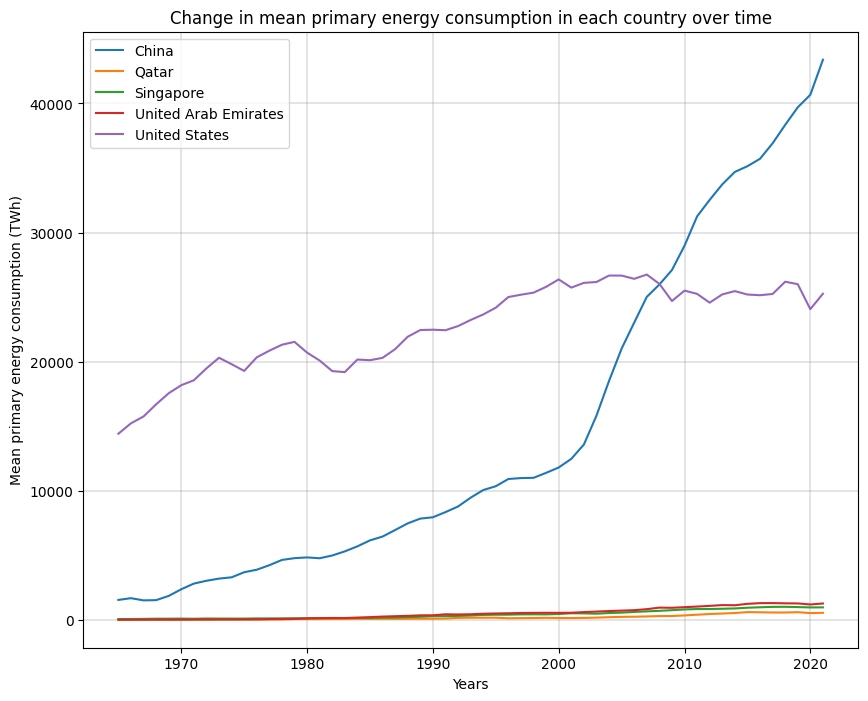

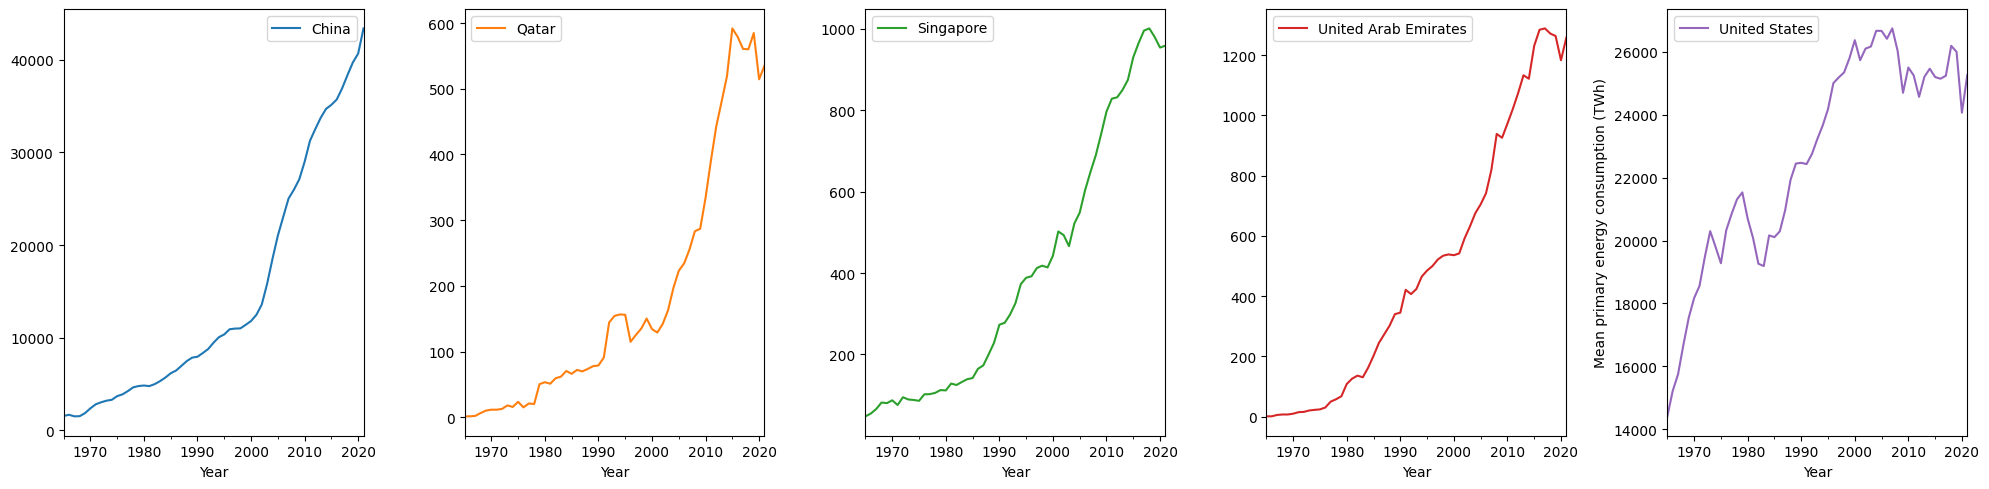

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(df)
plt.title("Change in mean primary energy consumption in each country over time")
plt.xlabel("Years")
plt.ylabel("Mean primary energy consumption (TWh)")
plt.legend(['China', 'Qatar', 'Singapore', 'United Arab Emirates', 'United States'])
plt.grid(color='grey', linestyle='-', linewidth=0.3)

df.plot(kind='line', subplots=True, rot=0, figsize=(20, 5), layout=(1, 5))
plt.ylabel("Mean primary energy consumption (TWh)")

plt.tight_layout()
plt.show()

- In the first line graph comapring all five countries together, we can see that both China and the United States have a greater mean primary energy consumption as compared to the other countries.
- Up till 2008, the mean primary energy consumption of the United States was greater than that of China. However, in 2008, China overtook the United States at around 26000 TWh.
- This is due the greater rate of increase of mean primary energy consumption in China as compared to the United States. From around 1960 to 2020, the mean primary energy consumption in the United States increase from 15000 TWh to 25000 TWh, a rate of around 167 TWh per year. This is unlike China, whose mean primary energy consumption increase from 2000 to 43000 TWh, a rate of around an astounding number of 683 TWh. Back then, it was around the same as the other countries, now, it has overtook the United States. The astounding increase could be due to the rapid industrialization of China around that time. The United States around at that time was also slowing down its industrialization.
- As we can hardly see the change in mean primary energy consumption of Qatar, Singapore and the United Arab Emirates. We will plot individual line plots for these countries.
- As we can see, the mean primary energy consumption increased steadily over the years for all three countries. United Arab Emirates has the highest mean primary energy consumption as well as rate of increase, followed by Singapore, and lastly Qatar.

Bar chart of sum and mean of primary and final energy consumption across the selected countries.

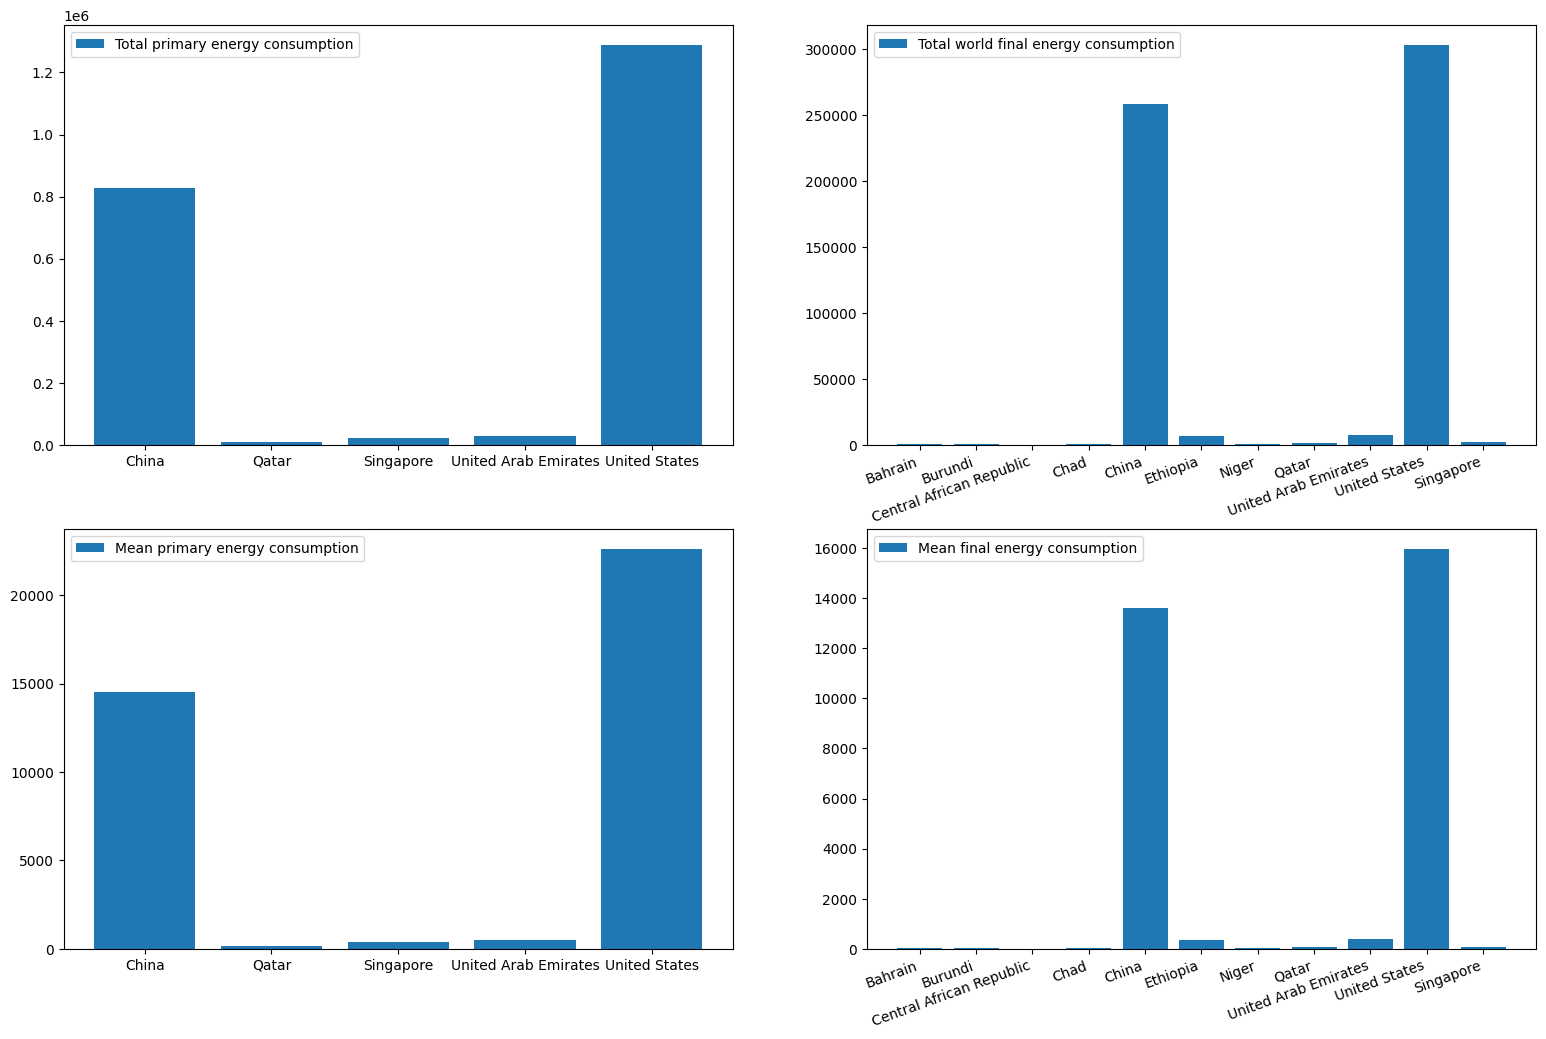

In [ ]:
plt.figure(1, figsize=(19, 12))

plt.subplot(221)
plt.bar(primary_energy_consum_selectedCountry.index, primary_energy_consum_selectedCountry.loc[:, (['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh',
'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh'], 'sum')].sum(axis=1).values, label = 'Total primary energy consumption')
plt.legend()

plt.subplot(222)
plt.bar(final_energy_consum_selectedCountry.index, final_energy_consum_selectedCountry['sum'].values, label = 'Total world final energy consumption')
plt.xticks(rotation=20, ha='right')
plt.legend()

plt.subplot(223)
plt.bar(primary_energy_consum_selectedCountry.index, primary_energy_consum_selectedCountry.loc[:, (['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh',
'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh'], 'mean')].sum(axis=1).values, label = 'Mean primary energy consumption')
plt.legend()

plt.subplot(224)
plt.bar(final_energy_consum_selectedCountry.index, final_energy_consum_selectedCountry['mean'].values, label = 'Mean final energy consumption')
plt.xticks(rotation=20, ha='right')
plt.legend()

plt.show()

- Now, comparing the final energy consumption across the selected countries, we can see that, unsurprisingly, China and the United States have the highest total and mean final energy consumption, due to fact that both countries have the highest total and mean final energy consumption
- This confirms that there is a relationship between primary and final energy consumption, as primary energy consumption of a country increases, the final energy consumption of that same country will increase too.

Stacked bar chart of different energy type consumed by selected countries.

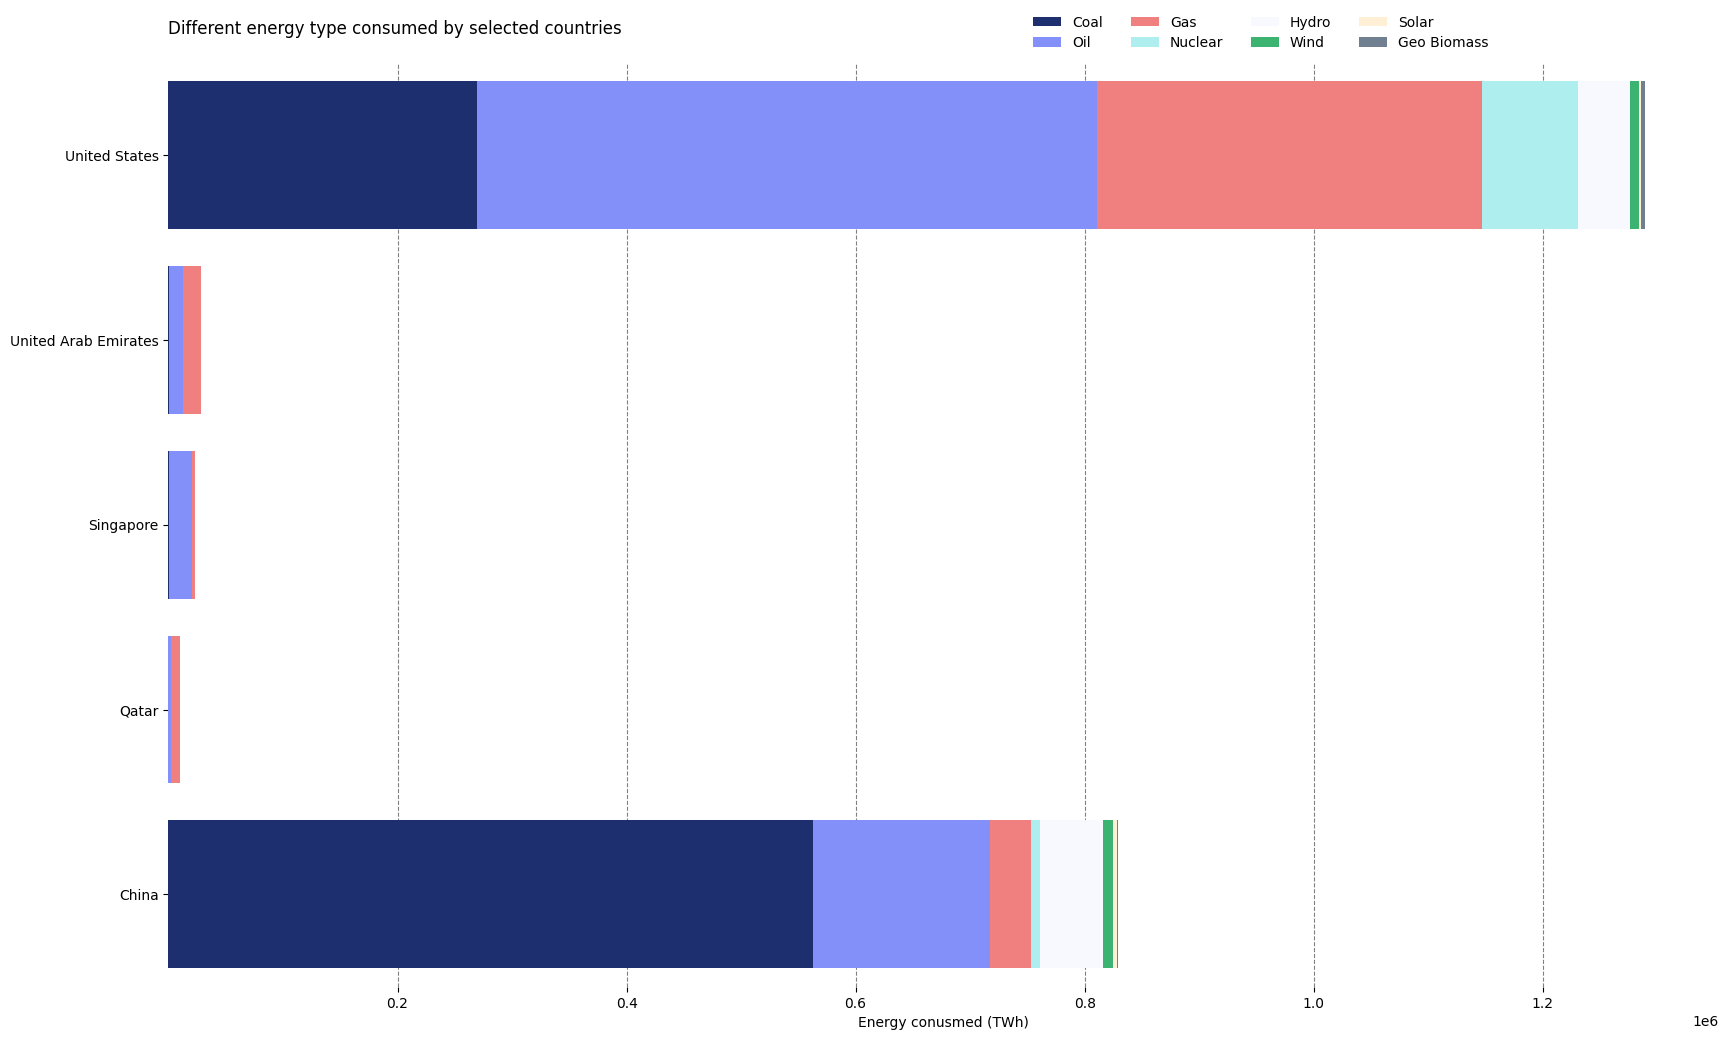

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 12))

fields = ['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh', 'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh']
colors = ['#1D2F6F', '#8390FA', 'lightcoral', 'paleturquoise', 'ghostwhite', 'mediumseagreen', 'papayawhip', 'slategray']
labels = ['Coal', 'Oil', 'Gas', 'Nuclear', 'Hydro', 'Wind', 'Solar', 'Geo Biomass']

# plot bars
left = len(primary_energy_consum_selectedCountry) * [0]
for idx, name in enumerate(fields):
    plt.barh(primary_energy_consum_selectedCountry.index, primary_energy_consum_selectedCountry.loc[:, (name, 'sum')], left = left, color=colors[idx])
    left = left + primary_energy_consum_selectedCountry.loc[:, (name, 'sum')]
    
# title, legend, labels
plt.title('Different energy type consumed by selected countries\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Energy conusmed (TWh)')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

- In this stacked bar chart, we will investigate the different types of energy resources that each country use.
- Energy can come from multiple energy resources, such as oil and wind. There are two types of energy resources, renewable and non-renewable. Renewable resources will naturally replenish themselves over time. However, non-renewable will be gone forever once used.
- The energy resources that we are looking at in this analysis are coal, oil, gas, nuclear, hydro, wind, solar and geo biomass. Geo biomass is made of material that comes from living organisms, such as plants and animals. Coal, oil ,gas and nuclear are non renewable resources. Hydro, wind, solar and geo biomass are renewable resources. Though nuclear is a non renewable resource, it is still recyclable. Thanks to advanced technologies, 96% of spent nuclear fuel in reactors is recyclable. This makes nuclear a better non renewable resource than coal, oil and gas.
- Looking at the stacked bar chart "Different energy type consumed by selected countries", we once again see that the bars for United Arab Emirates, Singapore and Qatar can hardly be seen. We will plot another stacked bar chart for them later, we will firstly look at the United States and China first.
- For both the United States and China, we can see that the huge percentage of energy resources used are non renewable, except for nuclear, nuclear takes up a smaller percentage in the United States. That percentage is even smaller in China.
- In the United States, the most used energy resource is oil, followed by coal and gas, then nuclear, hydro, wind, solar and finally geo biomass.
- However, in China, the most used energy resource is coal, with coal having a marginal gap compared to the second highest energy resources, which is oil. This is followed by hydro, gas, wind, nuclear, solar and finally geo biomass.

Stacked bar chart of different energy type consumed by the United Arab Emirates, Singapore and Qatar.

In [ ]:
fixed_primary_energy_consum_selectedCountry = primary_energy_consum_selectedCountry.drop(['China', 'United States'])

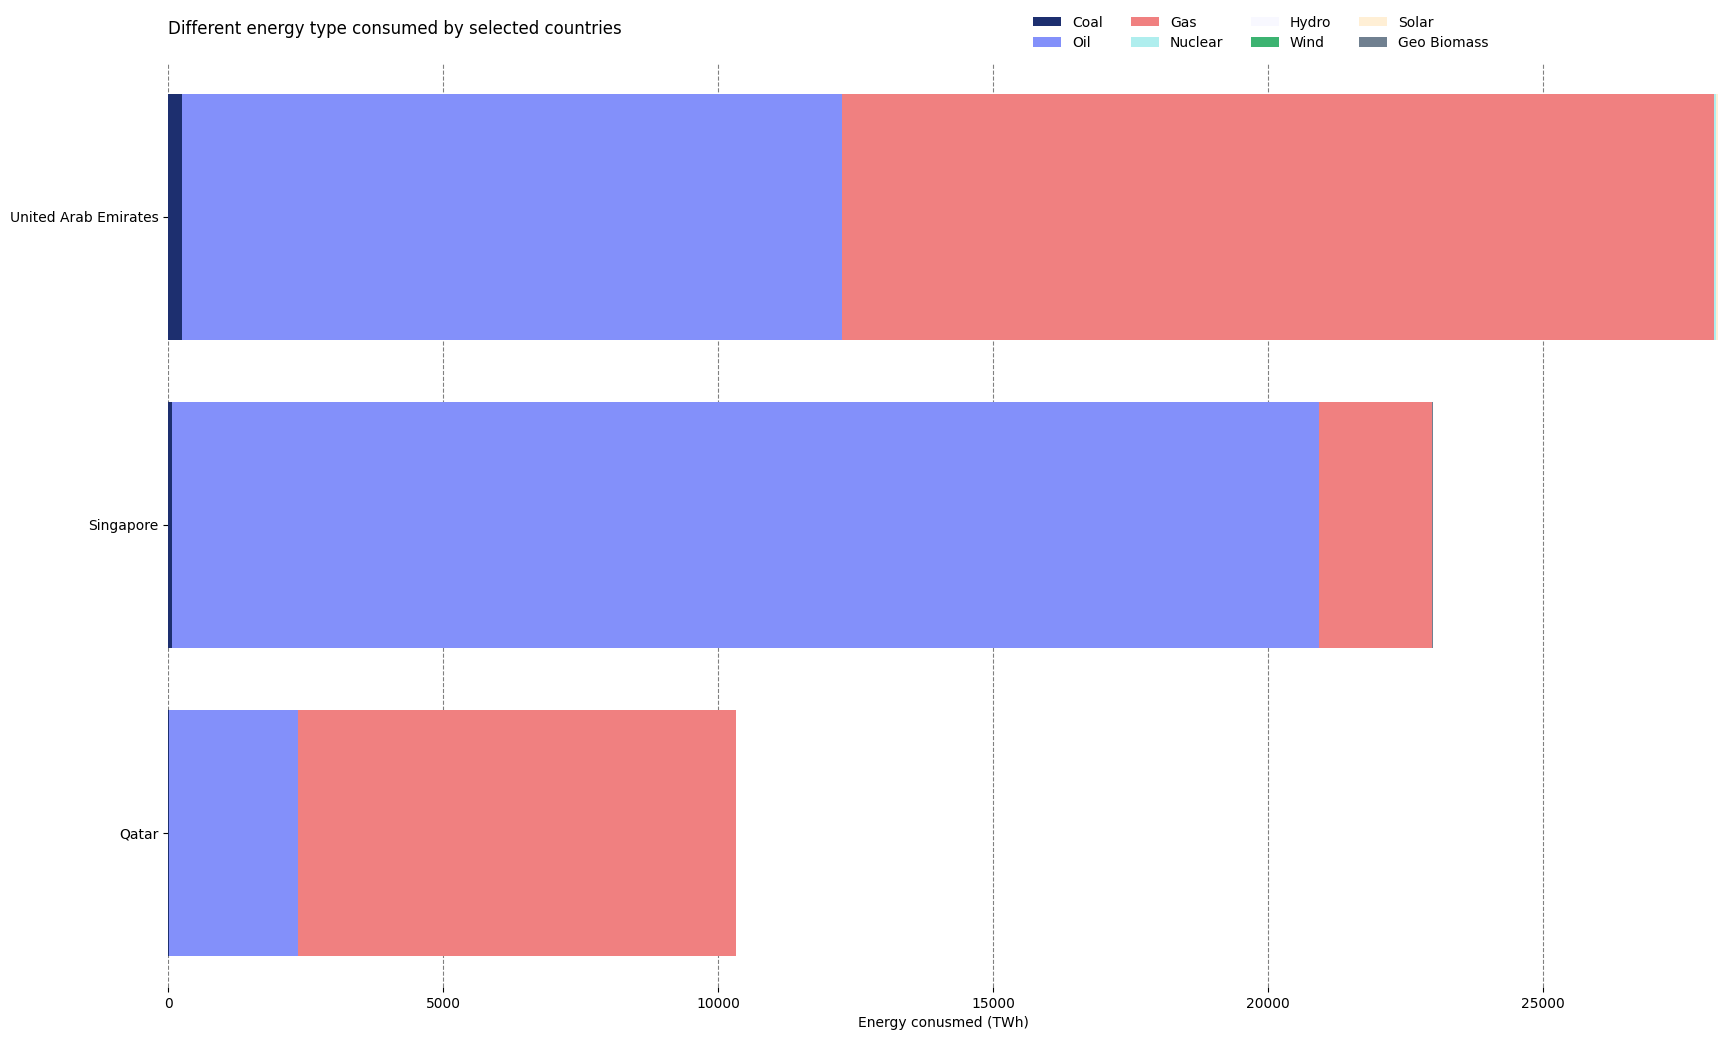

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 12))

fields = ['Coal Consumption - TWh', 'Oil Consumption - TWh', 'Gas Consumption - TWh', 'Nuclear Consumption - TWh', 'Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh']
colors = ['#1D2F6F', '#8390FA', 'lightcoral', 'paleturquoise', 'ghostwhite', 'mediumseagreen', 'papayawhip', 'slategray']
labels = ['Coal', 'Oil', 'Gas', 'Nuclear', 'Hydro', 'Wind', 'Solar', 'Geo Biomass']

# plot bars
left = len(fixed_primary_energy_consum_selectedCountry) * [0]
for idx, name in enumerate(fields):
    plt.barh(fixed_primary_energy_consum_selectedCountry.index, fixed_primary_energy_consum_selectedCountry.loc[:, (name, 'sum')], left = left, color=colors[idx])
    left = left + fixed_primary_energy_consum_selectedCountry.loc[:, (name, 'sum')]
    
# title, legend, labels
plt.title('Different energy type consumed by selected countries\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Energy conusmed (TWh)')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

- As we can see from the graph, the primary energy resources used by all three countries are oil and natural gas.
- In the United Arab Emirates, both oil and natural gas are used about equally, with the usage of natural gas being slightly more than oil
- In Singapore, oil takes up a huge proportion of the types of energy resources used. Even oil, which has the second biggest proportion in Singapore, is about 20 times smaller than the proportion of oil consumed.
- In Qatar, natural gas takes up a bigger proportion than that of oil, estimated to be around three times bigger.
- For all three countries, coal, nuclear and the rest of the renewable energy resources, can hardly be seen. This means that these three countries almost never use these energy resources.

Pie chart of the different energy resource usage across the world.

In [ ]:
df = world_primary_energy_consum_each_year_by_type.sum()
total_world_primary_energy_consum_by_type = df[:, 'sum']

In [ ]:
others = ['Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh']
total_world_primary_energy_consum_by_type.loc['others'] = total_world_primary_energy_consum_by_type.loc[others].sum()
total_world_primary_energy_consum_by_type = total_world_primary_energy_consum_by_type.drop(others)

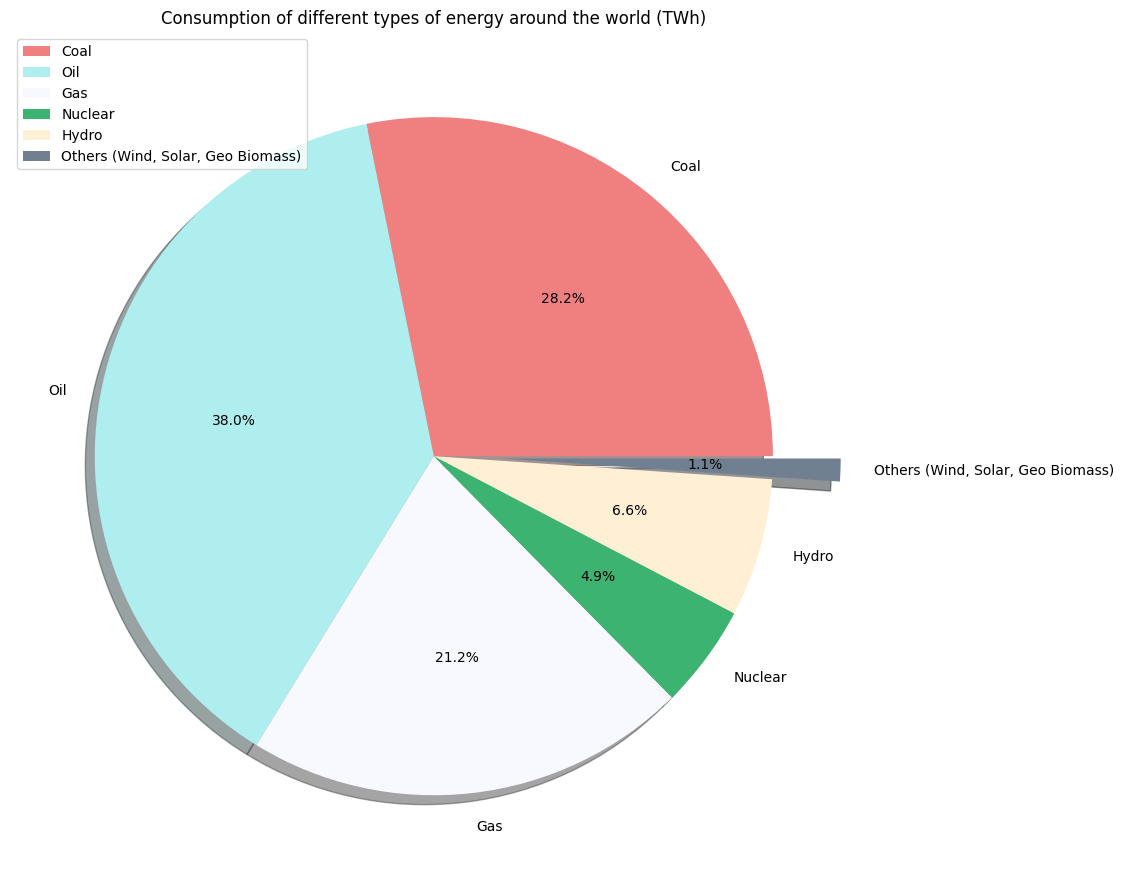

In [ ]:
plt.figure(1, figsize=(16, 9))

labels = ['Coal', 'Oil', 'Gas', 'Nuclear', 'Hydro', 'Others (Wind, Solar, Geo Biomass)']
colors = ['lightcoral', 'paleturquoise', 'ghostwhite', 'mediumseagreen', 'papayawhip', 'slategray']
explode = (0, 0, 0, 0, 0, 0.2)

plt.pie(total_world_primary_energy_consum_by_type, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', colors=colors)
plt.title("Consumption of different types of energy around the world (TWh)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

- Here, we have pie chart showing the consumption of different types of energy resources around the world.
- As we can see, the most used energy resource in the world is oil, at 38%, followed by coal at 28.2% and gas at 21.2%.
- The non renewable energy resources, excluding nuclear, are the top 3 most used energy resources in the world. It is expected, since non renewable energy resources are cheaper and more readily available than renewable energy resources.
- The rest are the renewable energy resources
- The fourth most used is hydro, at 6.6%. followed by nuclear at 4.9%. The rest, wind, solar and geo biomass, make up 1.1% of the world's usage.

#### Step 5.3: Supply of energy around the world.

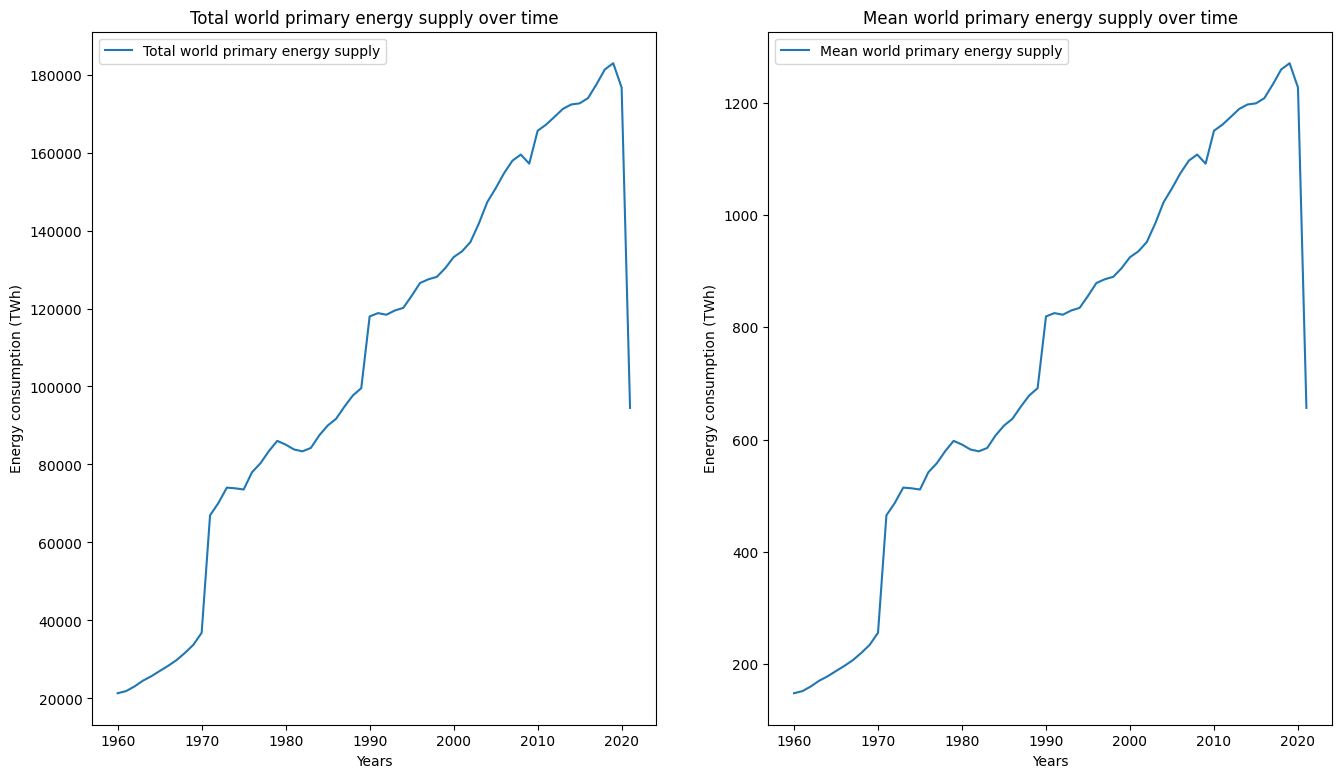

In [ ]:
plt.figure(1, figsize=(16, 9))

plt.subplot(121)
plt.plot(world_primary_energy_supply_each_year['sum'], label = 'Total world primary energy supply')
plt.title("Total world primary energy supply over time")
plt.xlabel("Years")
plt.ylabel("Energy consumption (TWh)")
plt.legend()

plt.subplot(122)
plt.plot(world_primary_energy_supply_each_year['mean'], label = 'Mean world primary energy supply')
plt.title("Mean world primary energy supply over time")
plt.xlabel("Years")
plt.ylabel("Energy consumption (TWh)")
plt.legend()

plt.show()

- As concluded from the first graph, the total and mean world primary energy supply increase steadily over the years, except for the year 2020, where both the total and mean world primary energy supply drop drastically due to the COVID-19 pandemic.
- Total world primary energy supply increased from 20000 TWh in 1960 to 180000 TWh in 2019 before dropping suddenly to 90000 in 2020.
- Mean world primary energy supply increased from 100 TWh in 1960 to 1300 TWh in 2019 before dropping suddenly to 700 in 2020.

#### Step 5.4: Why are we facing an energy crisis?

- Now, we are probably wondering, if the cause of an energy crisis is due to the demnand for energy being greater than the supply of energy, can't we just increase our supply of energy?
- Well, yes that is one of the solutions to an energy crisis, however, as simple as increasing the supply of energy may sound, it is actually is complicated issue lying underneath.
- Let's find out what that complicated issue is by drawing up some more graphs.

In [ ]:
# Extracting the required information from dataset
fossilfuel_left_years_by_year = fossilfuel_left_years.groupby('Year')[['Gas reserves/production ratio', 'Coal reserves/production ratio', 'Oil reserves/production ratio']].mean()

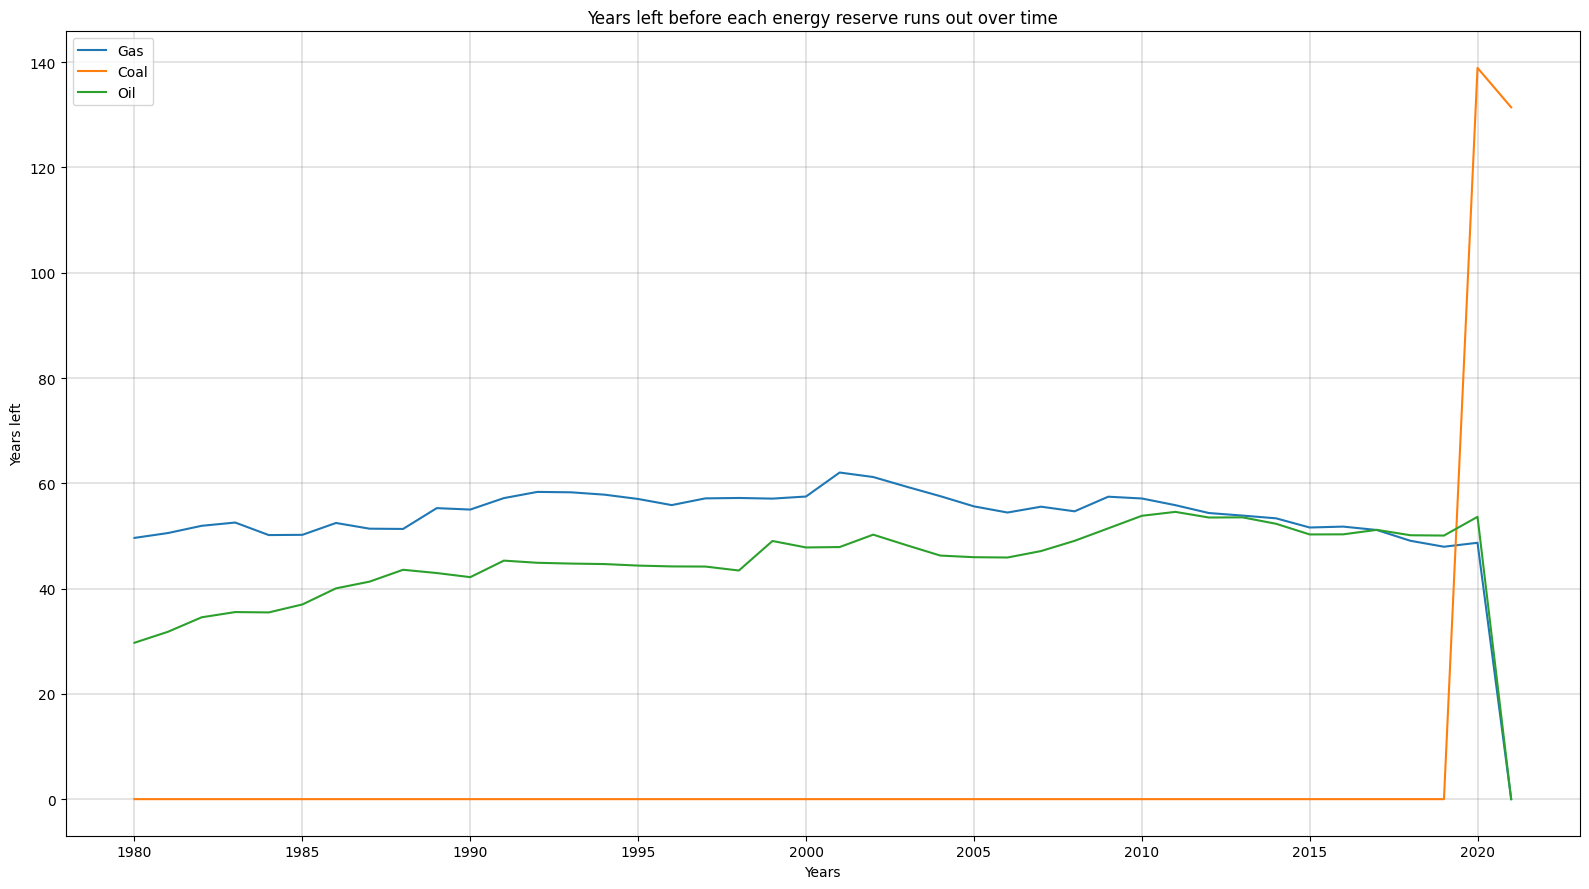

In [ ]:
plt.figure(1, figsize=(16, 9))

plt.plot(fossilfuel_left_years_by_year['Gas reserves/production ratio'], label = "Gas")
plt.plot(fossilfuel_left_years_by_year['Coal reserves/production ratio'], label = "Coal")
plt.plot(fossilfuel_left_years_by_year['Oil reserves/production ratio'], label = "Oil")
plt.title("Years left before each energy reserve runs out over time")
plt.xlabel("Years")
plt.ylabel("Years left")
plt.grid(color='grey', linestyle='-', linewidth=0.3)
plt.legend()
plt.tight_layout()
plt.show()

- As we remembered from the pie chart and stacked bar charts from earlier, the most use energy resources in the world are natural gas, oil and coal. However, these three energy resources, commomly referred as fossil fuels, are non renewable sources of energy. Once, their energy resources are depleted, they are gone forever, and we lose one type of energy supply.
- For reference, the values 0 in the y aixs (years left) do not mean anything. At that year, there wasn't any data for that specific energy resource.
- In the line graph above, it shows the number of years left before each energy reserves runs out, over the years, the years left of oil and natural gas remained at 47 and 50 years respectively. Although it did not decrease, which is a good thing, 50 years remaining is still a very short time. We have to find other sources of energy enough to supply 59.2% of the world in that time period. It is an alarmingly short time.
- The silver lining is that there is still 140 years left before coal runs out. For now, we only have to worry about the natural gas and oil supplies.

#### Step 5.5: Why is an energy crisis an important issue?

Preventing an energy crisis is an important issue for an energy crisis can bring about many negative imapcts on society. Such imapcts include social and economical impacts.
- Social impacts
    - Frequent Interruption to Electricity Supply
    - Since the demand for electricity is higher than the energy supply, frequent blackouts in different areas will occur since energy cannot be supply to everyone.
    - Not having access electricity can bring out disastrous consequences, for example, people need lights to see in the dark. Without electricity, accidents are prone to occur.
- Economic impacts
    - Increase Cost of Living
    - As energy is scarced in an energy crisis, prices for electricity will be a lot higher.
    - This causes people who are in a dire financial situation being unable to have access to electricity
    - Not just higher electricty bills, everything else will cost more too. Food, transportation, clothing, anything that uses electricity will see a price increase. Everyone will be affected, with people of dire financial need being hit the most

#### Step 5.6: What can we do to prevent an energy crisis?

An energy crisis seems very terrible, what can we do about it?
- Firstly, we need to switch from non-renewable energy resources to renewable ones. 
    - As mentioned earlier, non-renewable energy resources do not last forever, they are not a stable and secure energy resources. The years left before these non-renewable energy resources run out is not long. We have to start switching the renewable energy resources to provide energy to the big percentage of the world before these resources runs out and an energy crisis occurs.
    - However, for a country to change its main energy supply to renewable energy resources is very difficult due to the huge cost to build infrastructure to extract these resources. It may be possible for richer countries, but for the poorer countries, it is almost impossible to do so. For example, the price to build a solar farm costs between $400k to $500k per acre.
    - Hence, both poorer and richer countries can seek help from richer countries who have manage to change a sizeable amount of its energy supply to renewable energy resources, in terms of technology and finances. Richer countries can seek for the technologies used to extract renewable energy while the richer countries can provide financial aid to the poorer countries.

One example of a country who can try to change a sizeable amount of its energy supply to renewable energy resources is Singapore.

In [ ]:
# Extracting the required information from the dataset
sg_final_energy_consum_yearly = sg_final_energy_consum.groupby(['Year', 'energy_products'])['consumption_TWh'].sum()
print(sg_final_energy_consum_yearly)

Year        energy_products   
2009-01-01  Coal and Peat           0.034890
            Crude Oil               0.000000
            Electricity            38.822103
            Natural Gas            10.092514
            Others                  0.000000
                                     ...    
2019-01-01  Crude Oil               0.000000
            Electricity            51.713958
            Natural Gas            17.240312
            Others                  0.000000
            Petroleum Products    116.591913
Name: consumption_TWh, Length: 66, dtype: float64


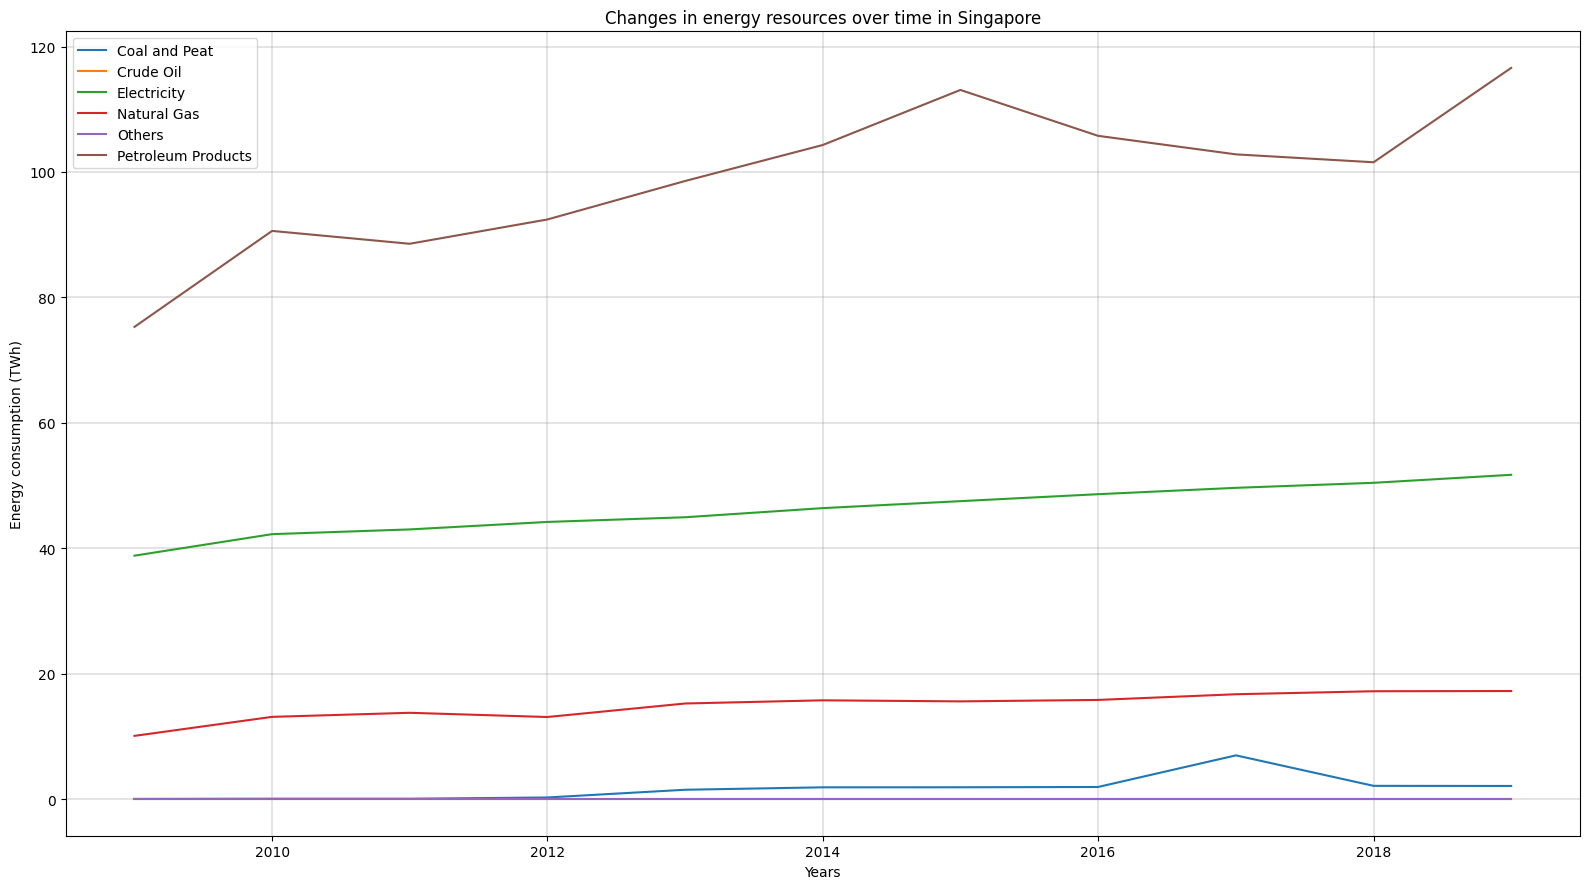

In [ ]:
plt.figure(1, figsize=(16, 9))

plt.plot(sg_final_energy_consum_yearly.unstack())
plt.title('Changes in energy resources over time in Singapore')
plt.xlabel('Years')
plt.ylabel('Energy consumption (TWh)')
plt.legend(['Coal and Peat', 'Crude Oil', 'Electricity', 'Natural Gas', 'Others', 'Petroleum Products'])
plt.grid(color='grey', linestyle='-', linewidth=0.3)

plt.tight_layout()
plt.show()

- As we can see from the line graph above, the amount of petroleum products that Singapore uses has been rising over the years instead of falling, from around 75 TWh in 2009 to around 120 TWh in 2019.
- Although Singapore has made a huge effort in changing its energy resources to renewable sources of energy, as seen in plans like the Singapore Green Plan 2023, where Singapore aims for all vehicles to run on cleaner-energy by 2030, it is still not enough.
- Perhaps like many other countries, Singapore can seek help from countries who have successfully change its main energy supply to renewable energy resources.
- Let's find what these countries are in the next graph below.

In [ ]:
# Extracting information from the dataset
df = primary_energy_consum.sort_values(['Entity', 'Year']).reset_index(drop=True)
primary_renewable_energy_consum = df.groupby('Entity')[['Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh']].agg(['first', 'last'])
df1 = primary_renewable_energy_consum.loc[:, (['Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh'], 'last')]
df2 = primary_renewable_energy_consum.loc[:, (['Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh'], 'first')]
df1.columns = df1.columns.droplevel(1)
df2.columns = df2.columns.droplevel(1)
df3 = df1 - df2

In [ ]:
columns = ['Hydro Consumption - TWh', 'Wind Consumption - TWh', 'Solar Consumption - TWh', 'Geo Biomass Other - TWh']
for column in columns:
    print(f'***{column}***')
    print(df3.sort_values(ascending=False, by=column))

***Hydro Consumption - TWh***
            Hydro Consumption - TWh  Wind Consumption - TWh  \
Entity                                                        
China                   3336.339410             1715.493400   
Brazil                   873.931080              189.149050   
Canada                   647.366760               91.889930   
India                    362.843440              178.180630   
Norway                   228.192910               30.790531   
...                             ...                     ...   
Uzbekistan                -1.696897                0.000644   
Latvia                    -1.711484                0.366335   
Ukraine                   -4.416265               10.213985   
Italy                    -13.403800               53.950943   
Japan                    -21.789230               21.587341   

            Solar Consumption - TWh  Geo Biomass Other - TWh  
Entity                                                        
China                   

We will take the top five countries with the greatest increase in energy consumption in each type of energy resource.
- Hydro energy
    - China
    - Brazil
    - Canada
    - India
    - Norway
- Wind energy
    - China
    - United States
    - Germany
    - Brazil
    - India
- Solar energy
    - China
    - United States
    - Japan
    - India
    - Germany
- Geo Biomass
    - China
    - United States
    - Brazil
    - Germany
    - United Kingdom

In [ ]:
hydro_countries = ['China', 'Brazil', 'Canada', 'India', 'Norway']
df4 = primary_energy_consum[primary_energy_consum['Entity'].isin(hydro_countries)].groupby(['Entity', 'Year'])['Hydro Consumption - TWh'].sum()

wind_countries = ['China', 'United States', 'Germany', 'Brazil', 'India']
df5 = primary_energy_consum[primary_energy_consum['Entity'].isin(wind_countries)].groupby(['Entity', 'Year'])['Wind Consumption - TWh'].sum()

solar_countries = ['China', 'United States', 'Japan', 'India', 'Germany']
df6 = primary_energy_consum[primary_energy_consum['Entity'].isin(solar_countries)].groupby(['Entity', 'Year'])['Solar Consumption - TWh'].sum()

geo_countries = ['China', 'United States', 'Brazil', 'Germany', 'United Kingdom']
df7 = primary_energy_consum[primary_energy_consum['Entity'].isin(geo_countries)].groupby(['Entity', 'Year'])['Geo Biomass Other - TWh'].sum()

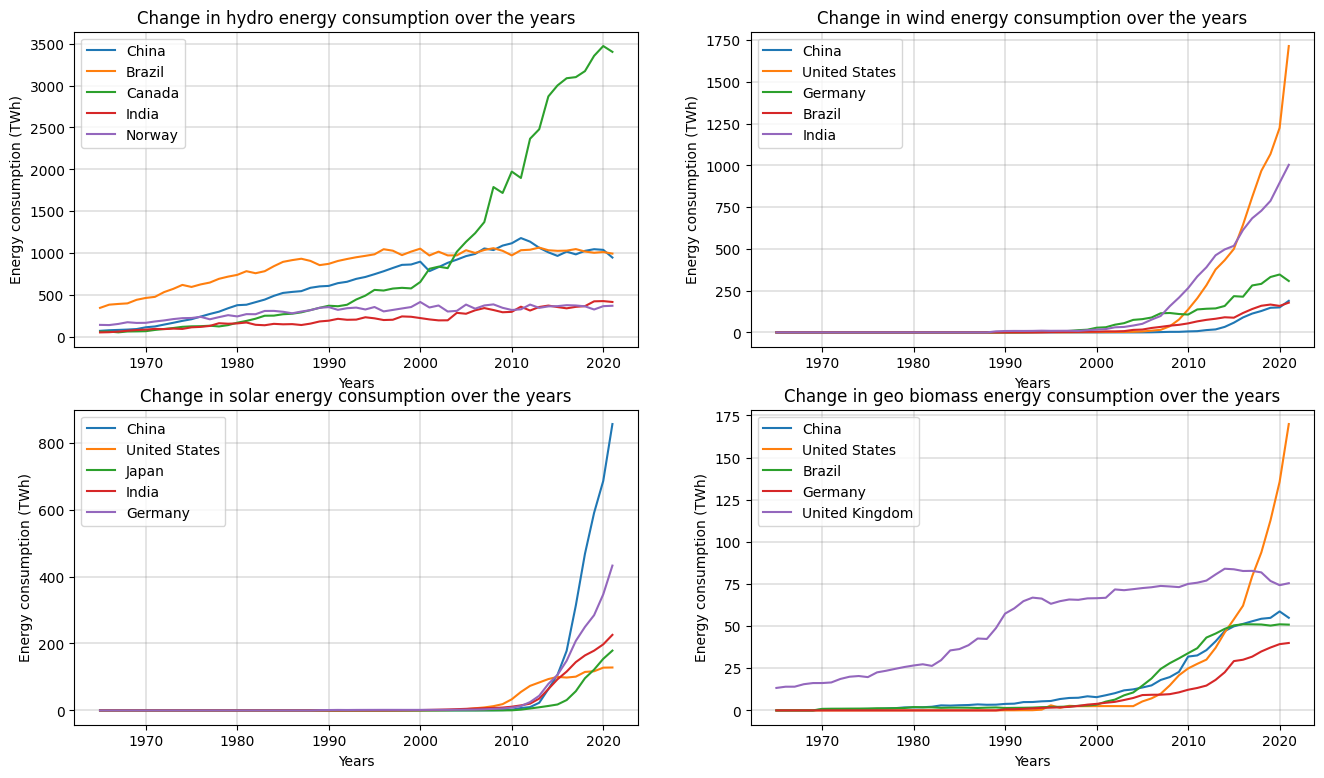

In [ ]:
plt.figure(1, figsize=(16, 9))

plt.subplot(221)
plt.plot(df4.unstack(level=0))
plt.title("Change in hydro energy consumption over the years")
plt.xlabel("Years")
plt.ylabel("Energy consumption (TWh)")
plt.grid(color='grey', linestyle='-', linewidth=0.3)
plt.legend(['China', 'Brazil', 'Canada', 'India', 'Norway'])

plt.subplot(222)
plt.plot(df5.unstack(level=0))
plt.title("Change in wind energy consumption over the years")
plt.xlabel("Years")
plt.ylabel("Energy consumption (TWh)")
plt.grid(color='grey', linestyle='-', linewidth=0.3)
plt.legend(['China', 'United States', 'Germany', 'Brazil', 'India'])

plt.subplot(223)
plt.plot(df6.unstack(level=0))
plt.title("Change in solar energy consumption over the years")
plt.xlabel("Years")
plt.ylabel("Energy consumption (TWh)")
plt.grid(color='grey', linestyle='-', linewidth=0.3)
plt.legend(['China', 'United States', 'Japan', 'India', 'Germany'])

plt.subplot(224)
plt.plot(df7.unstack(level=0))
plt.title("Change in geo biomass energy consumption over the years")
plt.xlabel("Years")
plt.ylabel("Energy consumption (TWh)")
plt.grid(color='grey', linestyle='-', linewidth=0.3)
plt.legend(['China', 'United States', 'Brazil', 'Germany', 'United Kingdom'])

plt.show()

- As we can see from the graphs above, these few countries saw the biggest increase in consumption of renewable energy resources. These countries are successful in changing a sizeable amount of its energy supply to renewable energy resources.
- In hydro energy, Canada has the greatest rate of increase, seen from the years 2000 to 2020.
- In wind energy, the United States has the greatest rate of increase, seen from the years 2010 to 2020. India is not too far behind too.
- In solar energy, China has the greatest rate of increase, seen from the years 2015 to 2020. Germany too is not far behind.
- In geo biomass energy, the United States once again has the greatest rate of increase, seen from the years 2004 to 2020.
- The countries with the greatest rate of increase means that these countries msut have deployed effective strategries or solutions to greatly increase their renewable energy resources in the shortest amount of time. This is important as we rush against time to move away from natural gas, oil and coal as our main primary sources of energy.
- Other countries should learn and seek help from these countries.

Other than switching from non-renewable energy resources to renewable ones, we can also reduce our energy consumption. We can do this through many ways, such as:
- Use energy efficient products or applicances (etc. use a compact fluorescent light bulb instead of an incandescent light bulb)
- Switching off appliances at the power socket when they are not in use
- Use public transport instead of cars

## Step 6: Conclusion

All in all, 
- Energy is precious and we should learn to treasure it. If not, devastating consequences like an energy crisis would occur. Everyone has a part to play in saving energy.
- We should start looking into using renewable energy resources as our primary source of energy, to prevent an energy crisis from occurring.
- I urge governments around the world to start cooperating with each other, to ensure that everyone starts to adopt renewable energy resources, put aside monetary gains or losses, and put the danger of an energy crisis as top priority first.